In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Affichage complet
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1. Chargement des datasets nettoyés

In [174]:
# Chemins des fichiers à concaténer
data_dir = '../Data/cleaned/'
files = [
    'baniola_clean_20251129_230044.csv',
    'automobile_tn_neuf_cleaned_20251130_160239.csv',
    'automobile_tn_occasion_cleaned_20251130_150807.csv',
    'spark_auto_cleaned_20251130_153943.csv'
    
]

sources = ['Baniola', 'Automobile.tn Neuf', 'Automobile.tn Occasion', 'Spark Auto']

# Charger tous les fichiers
dataframes = {}
for source, file in zip(sources, files):
    filepath = os.path.join(data_dir, file)
    if os.path.exists(filepath):
        df = pd.read_csv(filepath, encoding='utf-8-sig')
        df['Source'] = source  # Ajouter colonne source
        dataframes[source] = df
        print(f"✓ {source}: {len(df)} voitures chargées")
        print(f"  Colonnes: {list(df.columns)}")
        print()
    else:
        print(f"⚠️ Fichier non trouvé: {source}")
        print(f"   Chemin: {filepath}")
        print()

print(f"{'='*80}")
print(f"Total de sources chargées: {len(dataframes)}")
print(f"{'='*80}")

✓ Baniola: 743 voitures chargées
  Colonnes: ['Prix', 'Marque', 'Modele', 'Age', 'Kilometrage', 'Energie', 'Boite_Vitesses', 'Puissance_Fiscale', 'Source']

✓ Automobile.tn Neuf: 215 voitures chargées
  Colonnes: ['Prix', 'Marque', 'Modele', 'Age', 'Kilometrage', 'Energie', 'Boite_Vitesses', 'Puissance_Fiscale', 'Source']

✓ Automobile.tn Occasion: 1087 voitures chargées
  Colonnes: ['Prix', 'Marque', 'Modele', 'Age', 'Kilometrage', 'Energie', 'Boite_Vitesses', 'Puissance_Fiscale', 'Source']

✓ Spark Auto: 203 voitures chargées
  Colonnes: ['Prix', 'Marque', 'Modele', 'Age', 'Kilometrage', 'Energie', 'Boite_Vitesses', 'Puissance_Fiscale', 'Source']

Total de sources chargées: 4


## 2. Vérification de la structure des colonnes

In [175]:
# Vérifier que toutes les colonnes sont identiques (sauf 'Source')
print("Vérification des colonnes par source:\n")

all_columns = {}
for source, df in dataframes.items():
    cols = [c for c in df.columns if c != 'Source']
    all_columns[source] = set(cols)
    print(f"{source}:")
    print(f"  Nombre de colonnes: {len(cols)}")
    print(f"  Colonnes: {cols}")
    print()

# Vérifier la cohérence
first_cols = list(all_columns.values())[0]
all_identical = all(cols == first_cols for cols in all_columns.values())

if all_identical:
    print("✓ Toutes les sources ont les mêmes colonnes!")
else:
    print("⚠️ Les colonnes diffèrent entre les sources:")
    for source, cols in all_columns.items():
        diff = cols.symmetric_difference(first_cols)
        if diff:
            print(f"  {source}: différences = {diff}")

Vérification des colonnes par source:

Baniola:
  Nombre de colonnes: 8
  Colonnes: ['Prix', 'Marque', 'Modele', 'Age', 'Kilometrage', 'Energie', 'Boite_Vitesses', 'Puissance_Fiscale']

Automobile.tn Neuf:
  Nombre de colonnes: 8
  Colonnes: ['Prix', 'Marque', 'Modele', 'Age', 'Kilometrage', 'Energie', 'Boite_Vitesses', 'Puissance_Fiscale']

Automobile.tn Occasion:
  Nombre de colonnes: 8
  Colonnes: ['Prix', 'Marque', 'Modele', 'Age', 'Kilometrage', 'Energie', 'Boite_Vitesses', 'Puissance_Fiscale']

Spark Auto:
  Nombre de colonnes: 8
  Colonnes: ['Prix', 'Marque', 'Modele', 'Age', 'Kilometrage', 'Energie', 'Boite_Vitesses', 'Puissance_Fiscale']

✓ Toutes les sources ont les mêmes colonnes!


## 3. Concaténation des datasets

In [176]:
# Concaténer tous les datasets
df_combined = pd.concat(dataframes.values(), ignore_index=True)

print(f"{'='*80}")
print(f"DATASET COMBINÉ")
print(f"{'='*80}")
print(f"Total de voitures: {len(df_combined)}")
print(f"\nRépartition par source:")
print(df_combined['Source'].value_counts())
print(f"\nColonnes: {list(df_combined.columns)}")
print(f"Nombre de colonnes: {len(df_combined.columns)}")

DATASET COMBINÉ
Total de voitures: 2248

Répartition par source:
Source
Automobile.tn Occasion    1087
Baniola                    743
Automobile.tn Neuf         215
Spark Auto                 203
Name: count, dtype: int64

Colonnes: ['Prix', 'Marque', 'Modele', 'Age', 'Kilometrage', 'Energie', 'Boite_Vitesses', 'Puissance_Fiscale', 'Source']
Nombre de colonnes: 9


In [177]:
# Aperçu du dataset combiné
print("Aperçu du dataset combiné:\n")
df_combined.head(15)

Aperçu du dataset combiné:



,Prix,Marque,Modele,Age,Kilometrage,Energie,Boite_Vitesses,Puissance_Fiscale,Source
0,30500.00,Peugeot,208,7.00,80000.00,Essence,Manuelle,5.00,Baniola
1,23000.00,Peugeot,107,14.00,270.00,Essence,Manuelle,4.00,Baniola
2,30500.00,Peugeot,208,7.00,80000.00,Essence,Manuelle,5.00,Baniola
3,75000.00,Peugeot,3008,7.00,179000.00,Diesel,Automatique,6.00,Baniola
4,25500.00,Peugeot,208,9.00,160000.00,Essence,Manuelle,5.00,Baniola
5,26000.00,Peugeot,508,14.00,0.00,Diesel,Automatique,6.00,Baniola
6,9000.00,Peugeot,207,14.00,103000.00,Diesel,Manuelle,5.00,Baniola
7,25000.00,Peugeot,308,16.00,203000.00,Essence,Manuelle,6.00,Baniola
8,26500.00,Peugeot,308,17.00,195000.00,Essence,Automatique,5.00,Baniola
9,30000.00,Peugeot,208,10.00,113000.00,Essence,Manuelle,5.00,Baniola


In [178]:
# Informations sur le dataset
print("Informations du dataset combiné:\n")
df_combined.info()

Informations du dataset combiné:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Prix               2248 non-null   float64
 1   Marque             2248 non-null   object 
 2   Modele             2248 non-null   object 
 3   Age                2248 non-null   float64
 4   Kilometrage        2248 non-null   float64
 5   Energie            2248 non-null   object 
 6   Boite_Vitesses     2247 non-null   object 
 7   Puissance_Fiscale  2245 non-null   float64
 8   Source             2248 non-null   object 
dtypes: float64(4), object(5)
memory usage: 158.2+ KB


## 4. Analyse des valeurs manquantes

In [179]:
# Calculer les valeurs manquantes
missing_data = pd.DataFrame({
    'Colonne': df_combined.columns,
    'Valeurs manquantes': [df_combined[col].isna().sum() for col in df_combined.columns],
    'Pourcentage': [df_combined[col].isna().sum() / len(df_combined) * 100 for col in df_combined.columns]
})

missing_data = missing_data.sort_values('Pourcentage', ascending=False)

print("="*80)
print("ANALYSE DES VALEURS MANQUANTES")
print("="*80)
print(missing_data.to_string(index=False))

if missing_data['Valeurs manquantes'].sum() == 0:
    print("\n✓ Aucune valeur manquante dans le dataset!")
else:
    print(f"\n⚠️ Total de valeurs manquantes: {missing_data['Valeurs manquantes'].sum()}")

ANALYSE DES VALEURS MANQUANTES
          Colonne  Valeurs manquantes  Pourcentage
Puissance_Fiscale                   3         0.13
   Boite_Vitesses                   1         0.04
             Prix                   0         0.00
           Marque                   0         0.00
           Modele                   0         0.00
              Age                   0         0.00
      Kilometrage                   0         0.00
          Energie                   0         0.00
           Source                   0         0.00

⚠️ Total de valeurs manquantes: 4


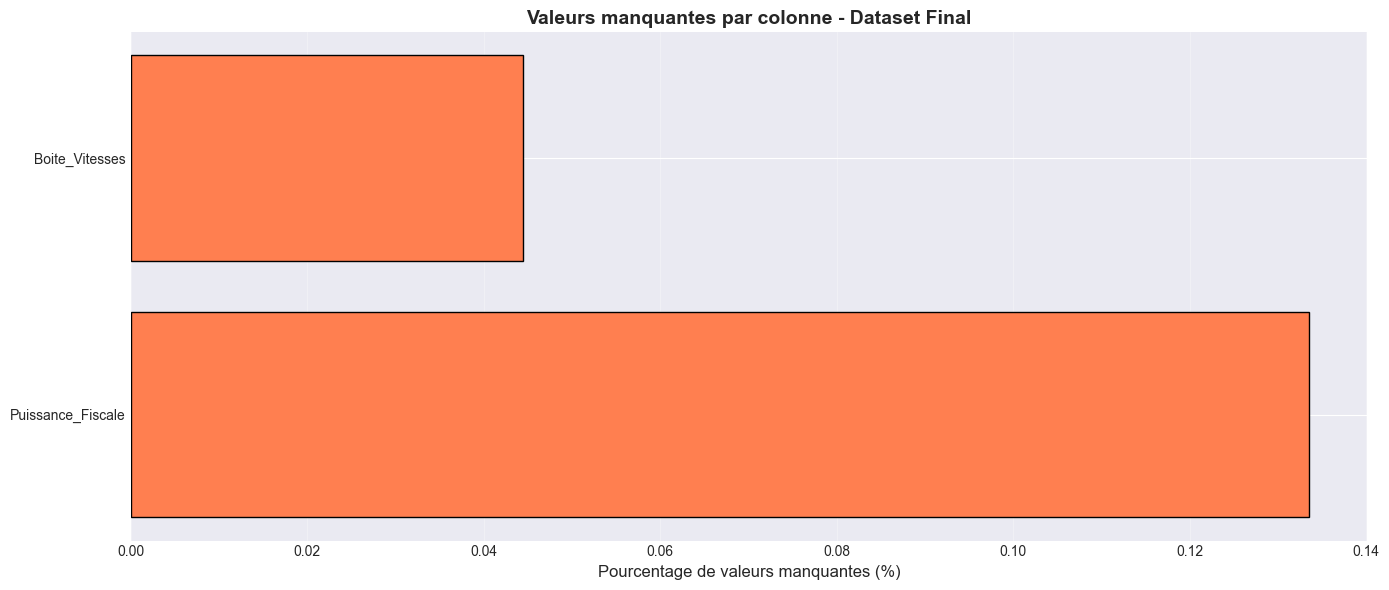

In [180]:
# Visualisation des valeurs manquantes
plt.figure(figsize=(14, 6))
missing_data_plot = missing_data[missing_data['Pourcentage'] > 0]

if len(missing_data_plot) > 0:
    plt.barh(missing_data_plot['Colonne'], missing_data_plot['Pourcentage'], color='coral', edgecolor='black')
    plt.xlabel('Pourcentage de valeurs manquantes (%)', fontsize=12)
    plt.title('Valeurs manquantes par colonne - Dataset Final', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Aucune valeur manquante!', 
             ha='center', va='center', fontsize=16, fontweight='bold')
    plt.axis('off')

plt.tight_layout()
plt.show()

## 5. Détection des doublons

In [181]:
# Analyser les doublons
print("="*80)
print("ANALYSE DES DOUBLONS")
print("="*80)

# Doublons sur les colonnes clés: Marque, Modele, Prix, Annee
key_cols = ['Marque', 'Modele', 'Prix', 'Age']
if all(col in df_combined.columns for col in key_cols):
    duplicates_keys = df_combined.duplicated(subset=key_cols).sum()
    print(f"Doublons détectés (Marque + Modele + Prix + Age): {duplicates_keys}")
    
    if duplicates_keys > 0:
        print(f"\n⚠️ {duplicates_keys} doublons détectés!")
        print("\nExemple de doublons:")
        duplicate_rows = df_combined[df_combined.duplicated(subset=key_cols, keep=False)].sort_values(key_cols)
        print(duplicate_rows[key_cols + ['Source']].head(-10))
    else:
        print("\n✓ Aucun doublon détecté!")
else:
    print("⚠️ Colonnes clés manquantes pour la détection des doublons")

ANALYSE DES DOUBLONS
Doublons détectés (Marque + Modele + Prix + Age): 115

⚠️ 115 doublons détectés!

Exemple de doublons:
       Marque                    Modele      Prix   Age                  Source
1861     Audi  Audi A3 Sportback S-Line 175000.00  0.00  Automobile.tn Occasion
1878     Audi  Audi A3 Sportback S-Line 175000.00  0.00  Automobile.tn Occasion
1442     Audi                   Audi Q8 350000.00  4.00  Automobile.tn Occasion
1522     Audi                   Audi Q8 350000.00  4.00  Automobile.tn Occasion
426   Citroen                     Autre  24000.00  8.00                 Baniola
...       ...                       ...       ...   ...                     ...
294        VW                      Polo  22500.00 18.00                 Baniola
295        VW                      Polo  22500.00 18.00                 Baniola
278        VW                      Polo  24300.00 16.00                 Baniola
701        VW                      Polo  24300.00 16.00                 Bani

In [182]:
# Supprimer les doublons si nécessaire
key_cols = ['Marque', 'Modele', 'Prix', 'Age']
duplicates_before = df_combined.duplicated(subset=key_cols).sum()

if duplicates_before > 0:
    print(f"Suppression de {duplicates_before} doublons (basé sur: Marque, Modele, Prix, Annee)...")
    df_clean = df_combined.drop_duplicates(subset=key_cols, keep='first').reset_index(drop=True)
    print(f"✓ Dataset après suppression: {len(df_clean)} voitures")
    print(f"  Voitures supprimées: {len(df_combined) - len(df_clean)}")
else:
    df_clean = df_combined.copy()
    print("✓ Aucun doublon à supprimer")

Suppression de 115 doublons (basé sur: Marque, Modele, Prix, Annee)...
✓ Dataset après suppression: 2133 voitures
  Voitures supprimées: 115


## 6. Statistiques descriptives complètes

In [183]:
# Statistiques numériques
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'Source' in numeric_cols:
    numeric_cols.remove('Source')

print("="*80)
print("STATISTIQUES DESCRIPTIVES - VARIABLES NUMÉRIQUES")
print("="*80)
print(df_clean[numeric_cols].describe())

STATISTIQUES DESCRIPTIVES - VARIABLES NUMÉRIQUES
           Prix     Age  Kilometrage  Puissance_Fiscale
count   2133.00 2133.00      2133.00            2130.00
mean   84040.11    7.45    108965.36               7.66
std    68466.74    6.10     90887.40               4.08
min     1111.00    0.00         0.00               2.00
25%    38500.00    3.00     38000.00               5.00
50%    63950.00    6.00     95000.00               7.00
75%   105900.00   11.00    161000.00               9.00
max   570000.00   38.00    670800.00              48.00


In [184]:
# Statistiques catégorielles
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

print("="*80)
print("STATISTIQUES DESCRIPTIVES - VARIABLES CATÉGORIELLES")
print("="*80)

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"  Valeurs uniques: {df_clean[col].nunique()}")
    print(f"  Distribution:")
    print(df_clean[col].value_counts().head(10))
    print("-" * 60)

STATISTIQUES DESCRIPTIVES - VARIABLES CATÉGORIELLES

MARQUE:
  Valeurs uniques: 97
  Distribution:
Marque
VW               250
Peugeot          242
Mercedes-Benz    233
BMW              105
Fiat              97
KIA               92
Citroen           87
Audi              76
Kia               60
Land              54
Name: count, dtype: int64
------------------------------------------------------------

MODELE:
  Valeurs uniques: 1085
  Distribution:
Modele
Rio                           42
Polo                          37
208                           27
Golf                          25
C3                            21
Mercedes-Benz Classe C AMG    21
Autres                        21
Mercedes-Benz Classe C        21
308                           19
Passat                        17
Name: count, dtype: int64
------------------------------------------------------------

ENERGIE:
  Valeurs uniques: 6
  Distribution:
Energie
Essence       1432
Diesel         490
Hybride        170
Electrique  

## 7. Détection des valeurs aberrantes (Outliers)

In [185]:
# Analyse des outliers avec méthode IQR
print("="*80)
print("DÉTECTION DES VALEURS ABERRANTES (Méthode IQR)")
print("="*80)

outliers_summary = []

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(df_clean)) * 100
    
    outliers_summary.append({
        'Colonne': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Borne inférieure': lower_bound,
        'Borne supérieure': upper_bound,
        'Nombre outliers': n_outliers,
        'Pourcentage': pct_outliers
    })
    
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Bornes: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers: {n_outliers} ({pct_outliers:.2f}%)")

outliers_df = pd.DataFrame(outliers_summary)
print(f"\n{'='*80}")
print("RÉSUMÉ DES OUTLIERS:")
print(outliers_df.to_string(index=False))

DÉTECTION DES VALEURS ABERRANTES (Méthode IQR)

Prix:
  Q1: 38500.00, Q3: 105900.00, IQR: 67400.00
  Bornes: [-62600.00, 207000.00]
  Outliers: 125 (5.86%)

Age:
  Q1: 3.00, Q3: 11.00, IQR: 8.00
  Bornes: [-9.00, 23.00]
  Outliers: 55 (2.58%)

Kilometrage:
  Q1: 38000.00, Q3: 161000.00, IQR: 123000.00
  Bornes: [-146500.00, 345500.00]
  Outliers: 41 (1.92%)

Puissance_Fiscale:
  Q1: 5.00, Q3: 9.00, IQR: 4.00
  Bornes: [-1.00, 15.00]
  Outliers: 109 (5.11%)

RÉSUMÉ DES OUTLIERS:
          Colonne       Q1        Q3       IQR  Borne inférieure  Borne supérieure  Nombre outliers  Pourcentage
             Prix 38500.00 105900.00  67400.00         -62600.00         207000.00              125         5.86
              Age     3.00     11.00      8.00             -9.00             23.00               55         2.58
      Kilometrage 38000.00 161000.00 123000.00        -146500.00         345500.00               41         1.92
Puissance_Fiscale     5.00      9.00      4.00             -1.00 

## 8. Visualisation - Boxplots pour toutes les variables numériques

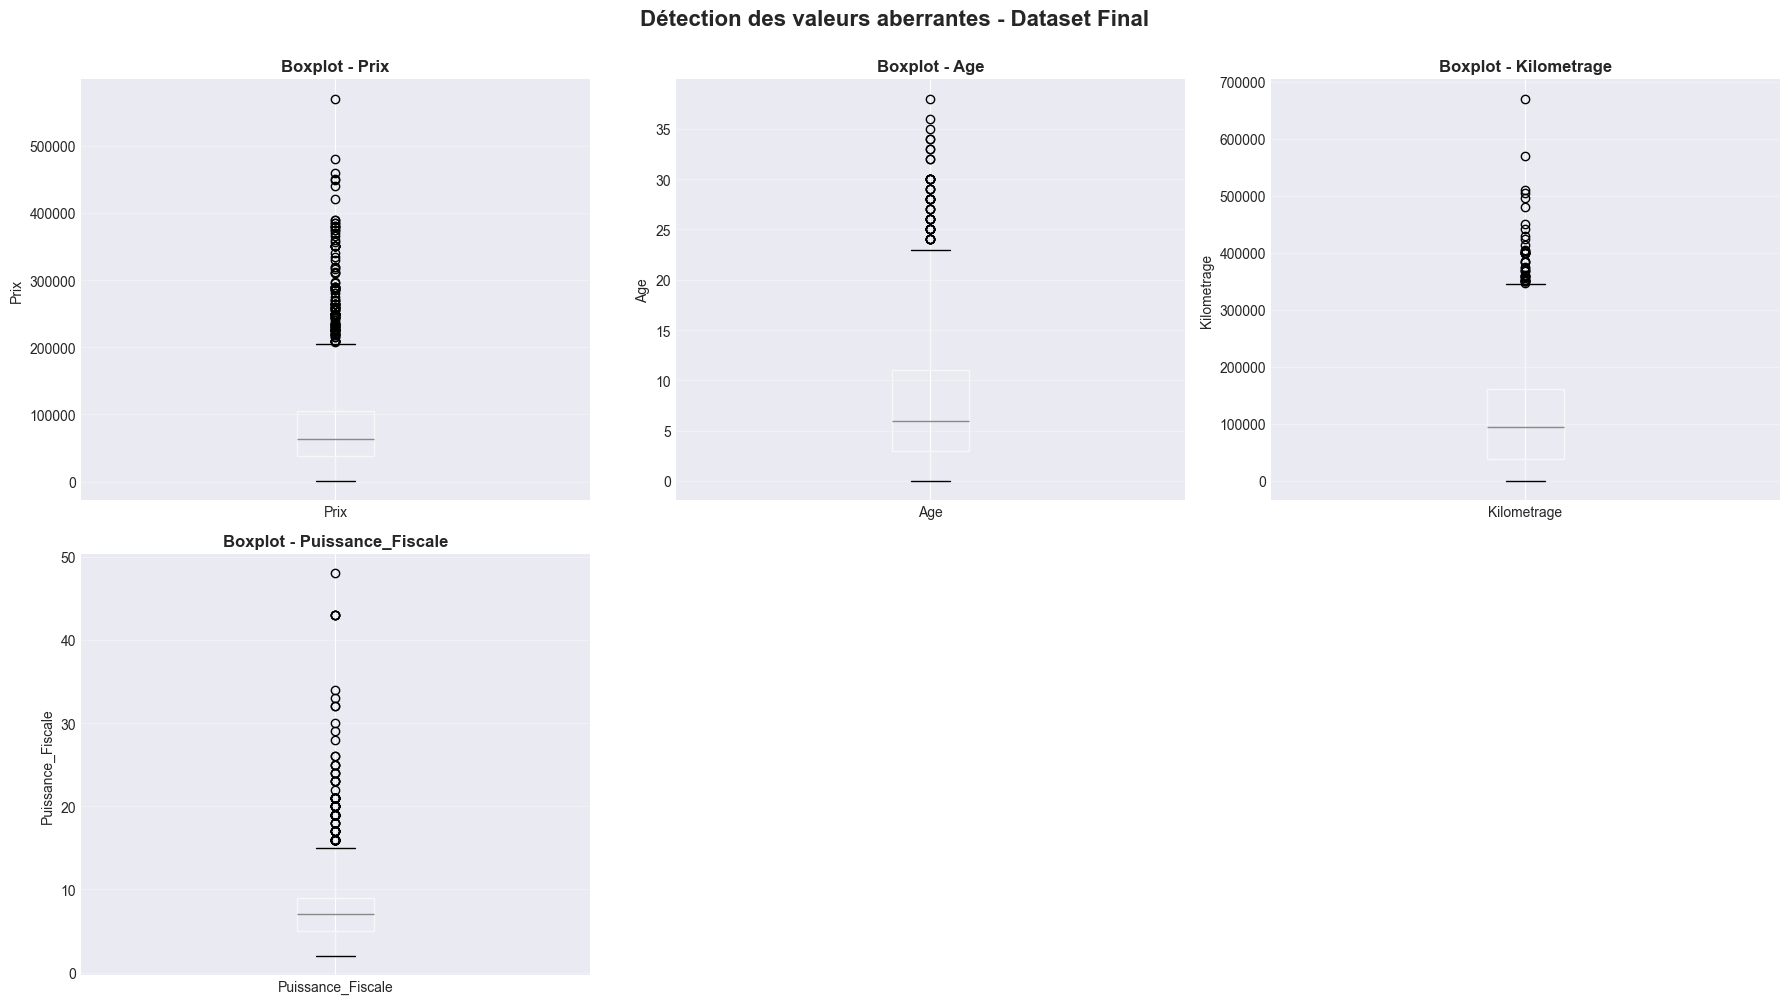

In [186]:
# Boxplots pour identifier les outliers visuellement
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    df_clean.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(f'Boxplot - {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(axis='y', alpha=0.3)

# Masquer les axes inutilisés
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Détection des valeurs aberrantes - Dataset Final', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 9. Distribution de toutes les variables numériques - Histogrammes

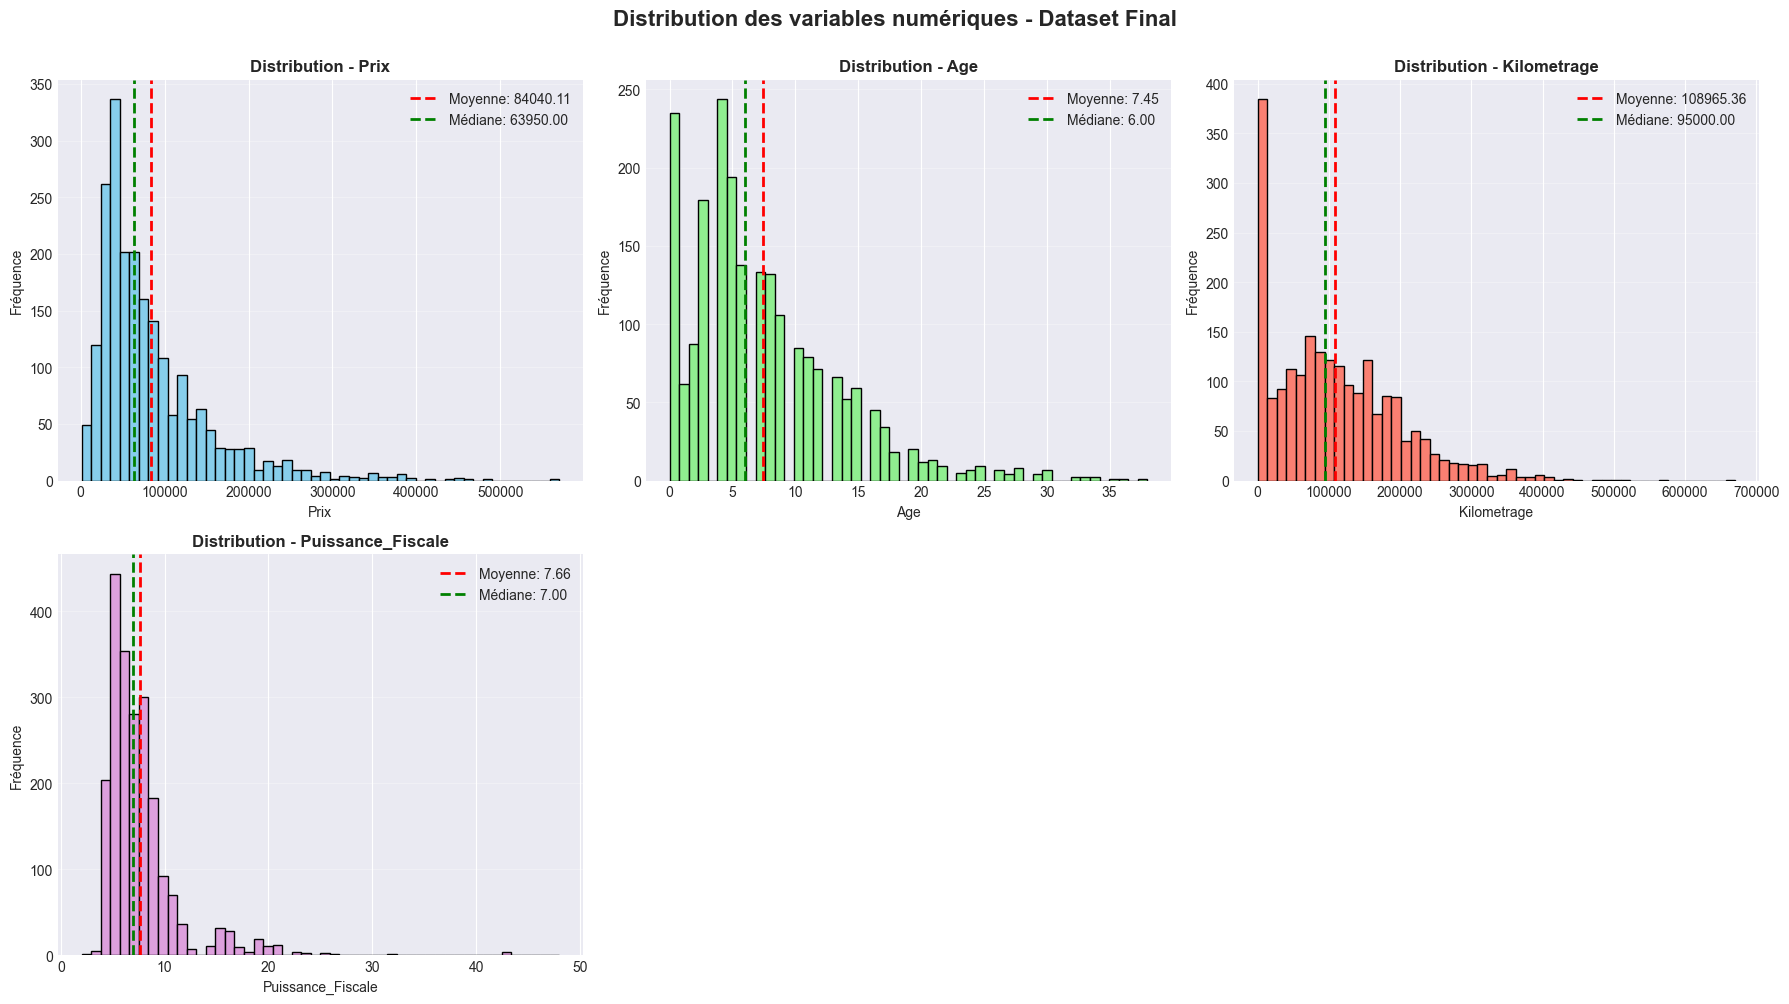

In [187]:
# Histogrammes pour toutes les variables numériques
n_cols_plot = len(numeric_cols)
n_rows_plot = (n_cols_plot + 2) // 3

fig, axes = plt.subplots(n_rows_plot, 3, figsize=(18, 5*n_rows_plot))
axes = axes.flatten() if n_cols_plot > 1 else [axes]

colors = ['skyblue', 'lightgreen', 'salmon', 'plum', 'gold', 'lightcoral']

for idx, col in enumerate(numeric_cols):
    color = colors[idx % len(colors)]
    df_clean[col].hist(bins=50, ax=axes[idx], color=color, edgecolor='black')
    axes[idx].set_title(f'Distribution - {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Fréquence')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Ajouter statistiques
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Médiane: {median_val:.2f}')
    axes[idx].legend()

# Masquer les axes inutilisés
for idx in range(n_cols_plot, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution des variables numériques - Dataset Final', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 10. Distribution de toutes les variables catégorielles

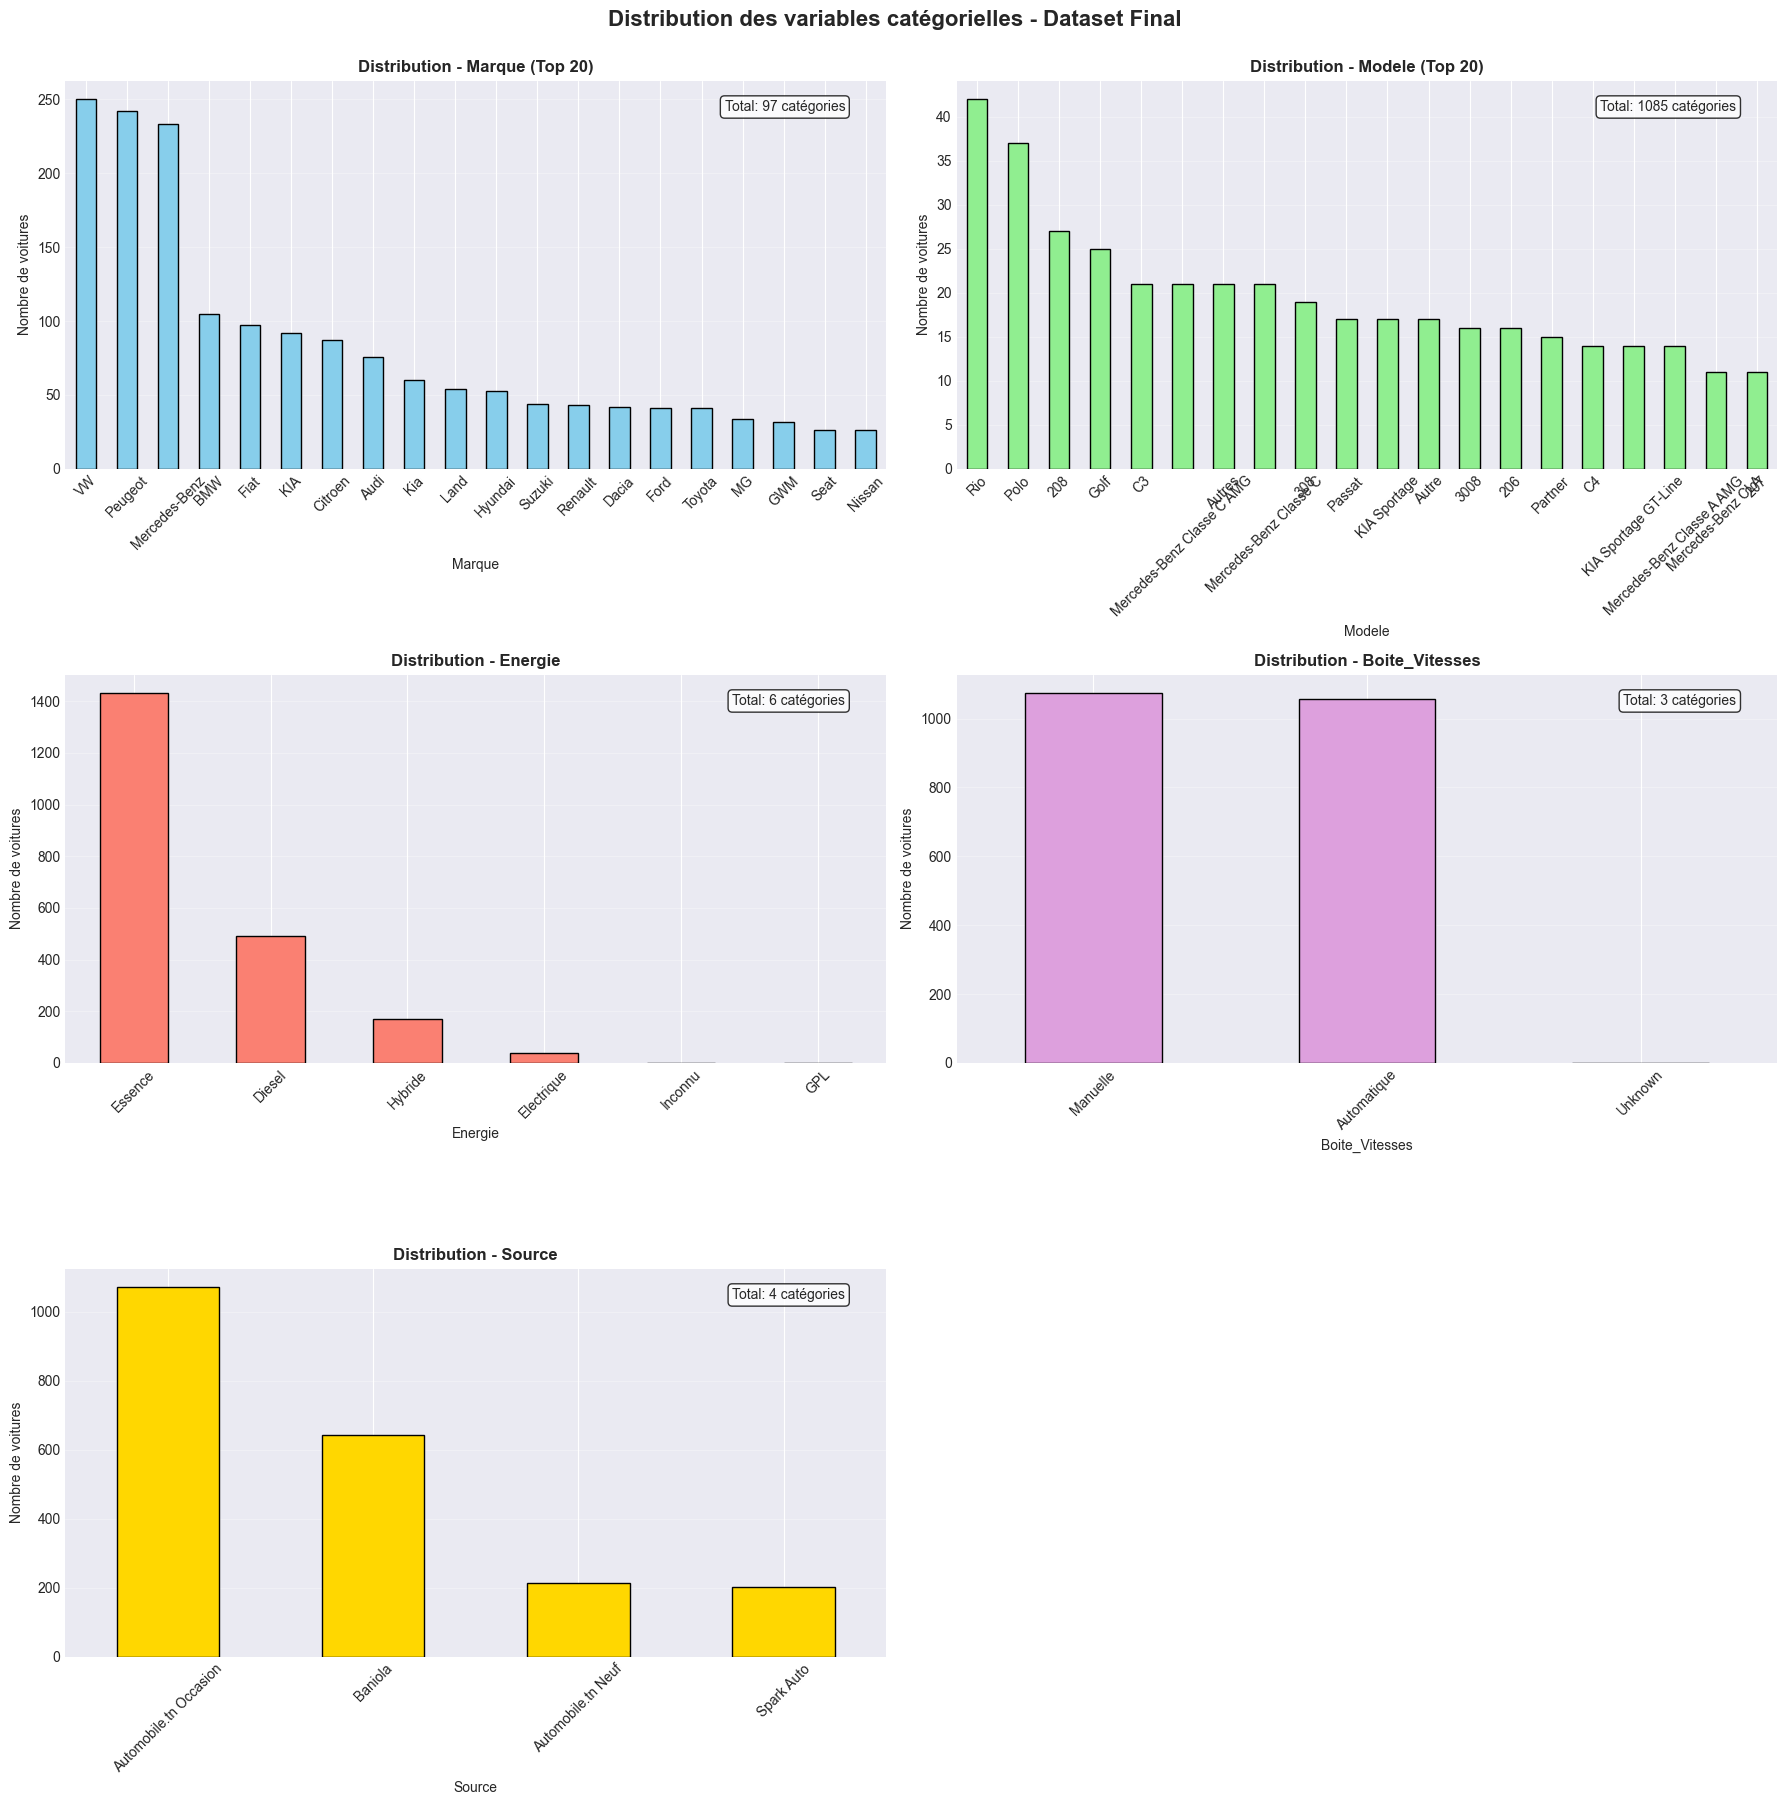

In [188]:
# Graphiques pour toutes les variables catégorielles
n_cat_cols = len(categorical_cols)
n_rows_cat = (n_cat_cols + 1) // 2

fig, axes = plt.subplots(n_rows_cat, 2, figsize=(18, 6*n_rows_cat))
axes = axes.flatten() if n_cat_cols > 1 else [axes]

colors_cat = ['skyblue', 'lightgreen', 'salmon', 'plum', 'gold', 'lightcoral', 'cyan', 'pink']

for idx, col in enumerate(categorical_cols):
    color = colors_cat[idx % len(colors_cat)]
    value_counts = df_clean[col].value_counts()
    
    # Limiter à top 20 si trop de valeurs
    if len(value_counts) > 20:
        value_counts = value_counts.head(20)
        title = f'Distribution - {col} (Top 20)'
    else:
        title = f'Distribution - {col}'
    
    value_counts.plot(kind='bar', ax=axes[idx], color=color, edgecolor='black')
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Nombre de voitures')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Ajouter le nombre total de catégories
    n_unique = df_clean[col].nunique()
    axes[idx].text(0.95, 0.95, f'Total: {n_unique} catégories', 
                   transform=axes[idx].transAxes, 
                   ha='right', va='top', 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Masquer les axes inutilisés
for idx in range(n_cat_cols, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution des variables catégorielles - Dataset Final', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 11. Répartition par source

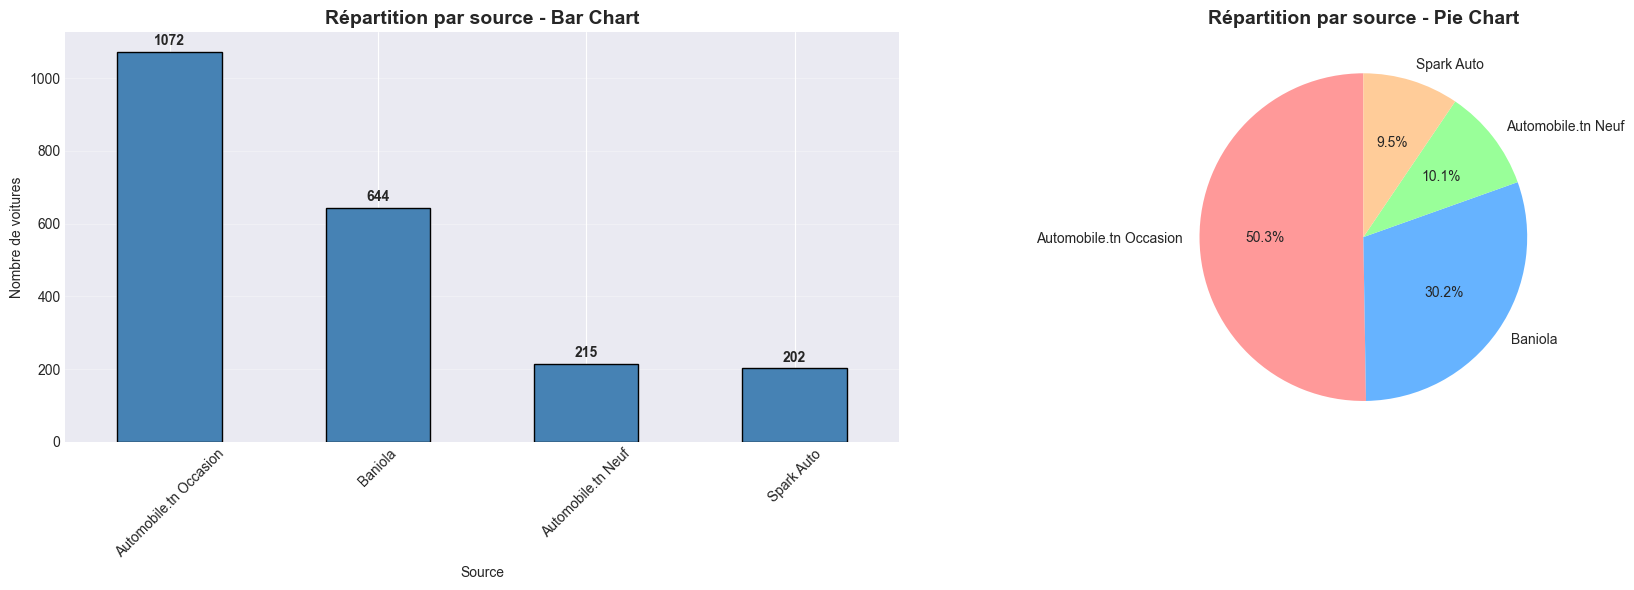


STATISTIQUES PAR SOURCE
Source
Automobile.tn Occasion    1072
Baniola                    644
Automobile.tn Neuf         215
Spark Auto                 202
Name: count, dtype: int64

Total: 2133 voitures


In [189]:
# Visualisation de la répartition par source
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar chart
source_counts = df_clean['Source'].value_counts()
source_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Répartition par source - Bar Chart', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Source')
axes[0].set_ylabel('Nombre de voitures')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, v in enumerate(source_counts):
    axes[0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
source_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                   colors=colors_pie, startangle=90)
axes[1].set_title('Répartition par source - Pie Chart', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("STATISTIQUES PAR SOURCE")
print("="*80)
print(df_clean['Source'].value_counts())
print(f"\nTotal: {len(df_clean)} voitures")

## 12. Analyse croisée - Prix par source

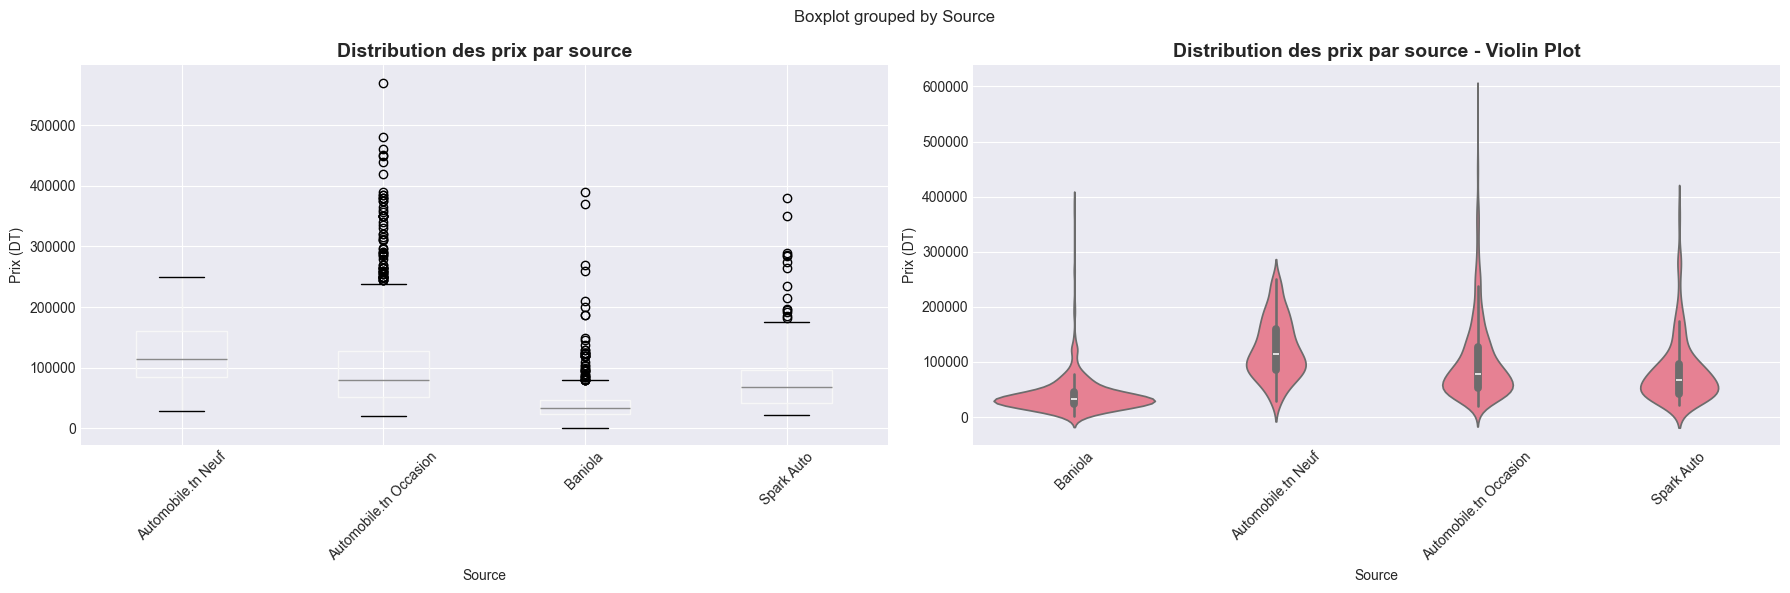


STATISTIQUES DES PRIX PAR SOURCE
                         count      mean      std      min      25%       50%       75%       max
Source                                                                                           
Automobile.tn Neuf      215.00 123983.00 53593.37 28700.00 85000.00 114950.00 159900.00 249980.00
Automobile.tn Occasion 1072.00 102282.12 74607.50 19900.00 52000.00  79000.00 127000.00 570000.00
Baniola                 644.00  40568.91 35009.23  1111.00 23650.00  33000.00  45925.00 390000.00
Spark Auto              202.00  83308.91 59562.11 22000.00 42125.00  67750.00  96000.00 380000.00


In [190]:
# Prix par source
if 'Prix' in df_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # Boxplot
    df_clean.boxplot(column='Prix', by='Source', ax=axes[0])
    axes[0].set_title('Distribution des prix par source', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Source')
    axes[0].set_ylabel('Prix (DT)')
    plt.sca(axes[0])
    plt.xticks(rotation=45)
    
    # Violin plot
    sns.violinplot(data=df_clean, x='Source', y='Prix', ax=axes[1])
    axes[1].set_title('Distribution des prix par source - Violin Plot', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Source')
    axes[1].set_ylabel('Prix (DT)')
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques
    print("\n" + "="*80)
    print("STATISTIQUES DES PRIX PAR SOURCE")
    print("="*80)
    print(df_clean.groupby('Source')['Prix'].describe())

## 12.5. Standardisation des marques

In [191]:
# Standardisation des marques incohérentes
print("="*80)
print("STANDARDISATION DES MARQUES")
print("="*80)

# Dictionnaire de mapping pour standardiser les marques
brand_mapping = {
    # KIA
    'Kia': 'KIA',
    'kia': 'KIA',
    
    # VOLKSWAGEN
    'VOLKSWAGEN': 'VW',
    'Volkswagen': 'VW',
    
    # CITROEN
    'Citroen': 'CITROEN',
    'Citroën': 'CITROEN',
    'CITROËN': 'CITROEN',
    'citroen': 'CITROEN',
    'citroën': 'CITROEN',
    
    # PEUGEOT
    'Peugeot': 'PEUGEOT',
    'peugeot': 'PEUGEOT',
    
    # MERCEDES
    'Mercedes': 'MERCEDES',
    'Mercedes-Benz': 'MERCEDES',
    'MERCEDES-BENZ': 'MERCEDES',
    'mercedes': 'MERCEDES',
    'mercedes-benz': 'MERCEDES',
    
    # HYUNDAI
    'Hyundai': 'HYUNDAI',
    'hyundai': 'HYUNDAI',
    
    # SKODA
    'Skoda': 'SKODA',
    'Škoda': 'SKODA',
    'skoda': 'SKODA',
    
    # CHERY
    'Chery': 'CHERY',
    'chery': 'CHERY',
    
    # GEELY
    'Geely': 'GEELY',
    'geely': 'GEELY',
    
    # SUZUKI
    'Suzuki': 'SUZUKI',
    'suzuki': 'SUZUKI',
    
    # NISSAN
    'Nissan': 'NISSAN',
    'nissan': 'NISSAN',
    
    # RENAULT
    'Renault': 'RENAULT',
    'renault': 'RENAULT',
    
    # VOLVO
    'Volvo': 'VOLVO',
    'volvo': 'VOLVO',
    
    # SEAT
    'Seat': 'SEAT',
    'seat': 'SEAT',
    
    # FIAT - Problème 1
    'FIAT': 'Fiat',
    'fiat': 'Fiat',
    
    # AUDI - Problème 1
    'AUDI': 'Audi',
    'audi': 'Audi',
    
    # MINI - Problème 1
    'MINI': 'Mini',
    'mini': 'Mini',
    
    # OPEL - Problème 1
    'OPEL': 'Opel',
    'opel': 'Opel',
    
    # TOYOTA - Problème 2
    'TOYOTA': 'Toyota',
    'toyota': 'Toyota',
    
    # DACIA - Problème 2
    'DACIA': 'Dacia',
    'dacia': 'Dacia',
    
    # BMW
    'bmw': 'BMW',
    'Bmw': 'BMW',
    
    # MG
    'MG': 'MG',
    'mg': 'MG',
    'Mg': 'MG',
    'MG ': 'MG',
    'mg ': 'MG',
    'Mg ': 'MG',
    
    # FORD
    'FORD': 'Ford',
    'ford': 'Ford',
    
    # MAZDA
    'MAZDA': 'Mazda',
    'mazda': 'Mazda',
    
    # ALFA ROMEO
    'Alfa Romeo': 'Alfa Romeo',
    'ALFA ROMEO': 'Alfa Romeo',
    'alfa romeo': 'Alfa Romeo',
    
    # DS
    'Ds': 'DS',
    'ds': 'DS',
    
    # BUICK
    'Buick': 'Buick',
    'BUICK': 'Buick',
    'buick': 'Buick',
    
    # MASERATI
    'Maserati': 'Maserati',
    'MASERATI': 'Maserati',
    'maserati': 'Maserati',
    
    # TESLA
    'Tesla': 'Tesla',
    'TESLA': 'Tesla',
    'tesla': 'Tesla',
    
    # BAIC
    'Baic': 'BAIC',
    'BAIC': 'BAIC',
    'baic': 'BAIC',
    'Baic ': 'BAIC',
    'BAIC ': 'BAIC',
    'baic ': 'BAIC',
    
    # ZXAUTO
    'ZXAUTO': 'ZXAUTO',
    'Zxauto': 'ZXAUTO',
    'zxauto': 'ZXAUTO',
    'ZXAUTO ': 'ZXAUTO',
    'Zxauto ': 'ZXAUTO',
    'zxauto ': 'ZXAUTO',
    
    # Great Wall
    'Great Wall': 'Great Wall',
    'GREAT WALL': 'Great Wall',
    'great wall': 'Great Wall',
    'Great': 'Great Wall',
    'GREAT': 'Great Wall'
}

# Afficher les marques avant standardisation
print("\nMarques uniques avant standardisation:")
print(f"  Total: {df_clean['Marque'].nunique()}")
print("\nExemples de marques à standardiser:")
for old_brand, new_brand in list(brand_mapping.items())[:10]:
    count = (df_clean['Marque'] == old_brand).sum()
    if count > 0:
        print(f"  {old_brand} → {new_brand}: {count} voitures")

# Appliquer le mapping
df_clean['Marque'] = df_clean['Marque'].replace(brand_mapping)

# Nettoyage supplémentaire: supprimer les espaces en début et fin
df_clean['Marque'] = df_clean['Marque'].str.strip()

# Afficher les résultats
print(f"\n{'='*80}")
print("RÉSULTATS DE LA STANDARDISATION")
print(f"{'='*80}")
print(f"Marques uniques après standardisation: {df_clean['Marque'].nunique()}")

# Compter le nombre de voitures affectées
affected_brands = [brand for brand in brand_mapping.keys() if brand in df_combined['Marque'].values]
total_affected = sum((df_combined['Marque'] == brand).sum() for brand in affected_brands)
print(f"Total de voitures standardisées: {total_affected}")

print("\n✓ Standardisation des marques terminée!")

STANDARDISATION DES MARQUES

Marques uniques avant standardisation:
  Total: 97

Exemples de marques à standardiser:
  Kia → KIA: 60 voitures
  VOLKSWAGEN → VW: 6 voitures
  Citroen → CITROEN: 87 voitures
  Citroën → CITROEN: 24 voitures
  CITROËN → CITROEN: 6 voitures
  Peugeot → PEUGEOT: 242 voitures

RÉSULTATS DE LA STANDARDISATION
Marques uniques après standardisation: 74
Total de voitures standardisées: 1060

✓ Standardisation des marques terminée!


## 12.6. Nettoyage du Modèle

In [192]:
# Nettoyage du Modèle: extraire le second mot si composé, sinon garder tel quel
print("="*80)
print("NETTOYAGE DU MODÈLE")
print("="*80)

print("\nExemples avant nettoyage:")
print(df_clean['Modele'].head(20))

def clean_modele(modele):
    """
    Si le modèle contient un seul mot: le garder tel quel
    Sinon: prendre le second mot seulement
    """
    if pd.isna(modele):
        return modele
    
    # Convertir en string et nettoyer les espaces
    modele_str = str(modele).strip()
    
    # Séparer par espaces
    mots = modele_str.split()
    
    # Si un seul mot: garder tel quel
    if len(mots) == 1:
        return mots[0]
    # Sinon: prendre le second mot
    else:
        return mots[1]

# Appliquer le nettoyage
df_clean['Modele'] = df_clean['Modele'].apply(clean_modele)

print("\n" + "="*80)
print("RÉSULTATS DU NETTOYAGE")
print("="*80)

print("\nExemples après nettoyage:")
print(df_clean['Modele'].head(20))

print(f"\nNombre de modèles uniques après nettoyage: {df_clean['Modele'].nunique()}")

# Distribution des modèles
print("\n" + "="*80)
print("DISTRIBUTION DES MODÈLES (Top 30)")
print("="*80)
print(df_clean['Modele'].value_counts().head(30))

print("\n✓ Nettoyage du modèle terminé!")

NETTOYAGE DU MODÈLE

Exemples avant nettoyage:
0        208
1        107
2       3008
3        208
4        508
5        207
6        308
7        308
8        208
9     Expert
10    Autres
11       206
12     Boxer
13       208
14      3008
15       307
16       407
17      2008
18      2008
19       206
Name: Modele, dtype: object

RÉSULTATS DU NETTOYAGE

Exemples après nettoyage:
0        208
1        107
2       3008
3        208
4        508
5        207
6        308
7        308
8        208
9     Expert
10    Autres
11       206
12     Boxer
13       208
14      3008
15       307
16       407
17      2008
18      2008
19       206
Name: Modele, dtype: object

Nombre de modèles uniques après nettoyage: 448

DISTRIBUTION DES MODÈLES (Top 30)
Modele
Classe      153
Golf         74
Rio          62
Série        61
Rover        57
Polo         51
208          50
Sportage     44
Tiguan       32
C3           31
Passat       30
308          28
CLA          27
3008         24
2008        

## 12.6. Imputation des valeurs inconnues (Energie et Boite_Vitesses)

In [193]:
# Imputation des valeurs inconnues dans Energie et Boite_Vitesses
print("="*80)
print("IMPUTATION DES VALEURS INCONNUES")
print("="*80)

# Vérifier les valeurs inconnues avant imputation
print("\nAvant imputation:")
if 'Energie' in df_clean.columns:
    unknown_energie = df_clean[df_clean['Energie'].isin(['Inconnu', 'Unknown', 'inconnu', 'unknown'])].shape[0]
    print(f"  Energie - valeurs inconnues: {unknown_energie}")
    print(f"  Distribution: {df_clean['Energie'].value_counts()}")

if 'Boite_Vitesses' in df_clean.columns:
    unknown_boite = df_clean[df_clean['Boite_Vitesses'].isin(['Unknown', 'Inconnu', 'unknown', 'inconnu'])].shape[0]
    print(f"\n  Boite_Vitesses - valeurs inconnues: {unknown_boite}")
    print(f"  Distribution: {df_clean['Boite_Vitesses'].value_counts()}")

# Imputation pour Energie: remplacer par le mode (valeur la plus fréquente)
if 'Energie' in df_clean.columns:
    # Identifier la valeur la plus fréquente (hors Unknown/Inconnu)
    energie_mode = df_clean[~df_clean['Energie'].isin(['Inconnu', 'Unknown', 'inconnu', 'unknown'])]['Energie'].mode()[0]
    print(f"\n  Mode de Energie (hors inconnus): {energie_mode}")
    
    # Remplacer les valeurs inconnues par le mode
    mask_energie = df_clean['Energie'].isin(['Inconnu', 'Unknown', 'inconnu', 'unknown'])
    df_clean.loc[mask_energie, 'Energie'] = energie_mode
    print(f"  ✓ {mask_energie.sum()} valeurs imputées avec '{energie_mode}'")

# Imputation pour Boite_Vitesses: remplacer par le mode
if 'Boite_Vitesses' in df_clean.columns:
    # Identifier la valeur la plus fréquente (hors Unknown/Inconnu)
    boite_mode = df_clean[~df_clean['Boite_Vitesses'].isin(['Unknown', 'Inconnu', 'unknown', 'inconnu'])]['Boite_Vitesses'].mode()[0]
    print(f"\n  Mode de Boite_Vitesses (hors inconnus): {boite_mode}")
    
    # Remplacer les valeurs inconnues par le mode
    mask_boite = df_clean['Boite_Vitesses'].isin(['Unknown', 'Inconnu', 'unknown', 'inconnu'])
    df_clean.loc[mask_boite, 'Boite_Vitesses'] = boite_mode
    print(f"  ✓ {mask_boite.sum()} valeurs imputées avec '{boite_mode}'")

# Vérification après imputation
print(f"\n{'='*80}")
print("APRÈS IMPUTATION")
print(f"{'='*80}")

if 'Energie' in df_clean.columns:
    print("\nEnergie:")
    print(df_clean['Energie'].value_counts())
    unknown_after = df_clean[df_clean['Energie'].isin(['Inconnu', 'Unknown', 'inconnu', 'unknown'])].shape[0]
    print(f"  Valeurs inconnues restantes: {unknown_after}")

if 'Boite_Vitesses' in df_clean.columns:
    print("\nBoite_Vitesses:")
    print(df_clean['Boite_Vitesses'].value_counts())
    unknown_after = df_clean[df_clean['Boite_Vitesses'].isin(['Unknown', 'Inconnu', 'unknown', 'inconnu'])].shape[0]
    print(f"  Valeurs inconnues restantes: {unknown_after}")

print("\n✓ Imputation terminée!")

IMPUTATION DES VALEURS INCONNUES

Avant imputation:
  Energie - valeurs inconnues: 1
  Distribution: Energie
Essence       1432
Diesel         490
Hybride        170
Electrique      39
Inconnu          1
GPL              1
Name: count, dtype: int64

  Boite_Vitesses - valeurs inconnues: 1
  Distribution: Boite_Vitesses
Manuelle       1074
Automatique    1057
Unknown           1
Name: count, dtype: int64

  Mode de Energie (hors inconnus): Essence
  ✓ 1 valeurs imputées avec 'Essence'

  Mode de Boite_Vitesses (hors inconnus): Manuelle
  ✓ 1 valeurs imputées avec 'Manuelle'

APRÈS IMPUTATION

Energie:
Energie
Essence       1433
Diesel         490
Hybride        170
Electrique      39
GPL              1
Name: count, dtype: int64
  Valeurs inconnues restantes: 0

Boite_Vitesses:
Boite_Vitesses
Manuelle       1075
Automatique    1057
Name: count, dtype: int64
  Valeurs inconnues restantes: 0

✓ Imputation terminée!


## 12.7. Regroupement des marques par catégorie

In [194]:
# Regroupement des marques par catégorie
print("="*80)
print("REGROUPEMENT DES MARQUES PAR CATÉGORIE")
print("="*80)

# Dictionnaire de regroupement des marques
brand_grouping = {
    # A. Marques japonaises
    'HONDA': 'JAPANESE',
    'Honda': 'JAPANESE',
    'Mitsubishi': 'JAPANESE',
    'MITSUBISHI': 'JAPANESE',
    'Mazda': 'JAPANESE',
    'MAZDA': 'JAPANESE',
    'Infiniti': 'JAPANESE',
    'INFINITI': 'JAPANESE',
    'Subaru': 'JAPANESE',
    'SUBARU': 'JAPANESE',
    'Lexus': 'JAPANESE',
    'LEXUS': 'JAPANESE',
    'Acura': 'JAPANESE',
    'ACURA': 'JAPANESE',
    
    # B. Marques américaines
    'Jeep': 'AMERICAN',
    'JEEP': 'AMERICAN',
    'Chevrolet': 'AMERICAN',
    'CHEVROLET': 'AMERICAN',
    'Cadillac': 'AMERICAN',
    'CADILLAC': 'AMERICAN',
    'Hummer': 'AMERICAN',
    'HUMMER': 'AMERICAN',
    'Buick': 'AMERICAN',  # Marque américaine (General Motors)
    'BUICK': 'AMERICAN',
    'Corvette': 'AMERICAN',  # Modèle Chevrolet devenu marque
    'CORVETTE': 'AMERICAN',
    'Tesla': 'AMERICAN',  # Constructeur américain électrique
    'TESLA': 'AMERICAN',
    
    # C. Marques chinoises modernes
    'GEELY': 'CHINESE',
    'Geely': 'CHINESE',
    'GAC': 'CHINESE',
    'DFSK': 'CHINESE',
    'DONGFENG': 'CHINESE',
    'Dongfeng': 'CHINESE',
    'CHANGAN': 'CHINESE',
    'Changan': 'CHINESE',
    'JETOUR': 'CHINESE',
    'Jetour': 'CHINESE',
    'BYD': 'CHINESE',
    'OMODA': 'CHINESE',
    'Omoda': 'CHINESE',
    'WALLYSCAR': 'CHINESE',
    'WALLYSAR': 'CHINESE',
    'Great': 'CHINESE',
    'GREAT': 'CHINESE',
    'Great Wall': 'CHINESE',
    'GREAT WALL': 'CHINESE',
    'Ssangyong': 'CHINESE',  # Problème 3 - Groupe chinois SAIC
    'SSANGYONG': 'CHINESE',
    'Haval': 'CHINESE',  # Problème 3
    'HAVAL': 'CHINESE',
    'Shuanghuan': 'CHINESE',  # Marque chinoise rare
    'SHUANGHUAN': 'CHINESE',
    'BAIC': 'CHINESE',
    'Baic': 'CHINESE',
    'baic': 'CHINESE',
    'ZXAUTO': 'CHINESE',
    'Zxauto': 'CHINESE',
    'zxauto': 'CHINESE',
    'FAW': 'CHINESE',
    'Faw': 'CHINESE',
    'faw': 'CHINESE',
    'JMC': 'CHINESE',
    'Jmc': 'CHINESE',
    'jmc': 'CHINESE',
    
    # D. Marques premium luxe
    'Jaguar': 'LUXURY_BRAND',
    'JAGUAR': 'LUXURY_BRAND',
    'VOLVO': 'LUXURY_BRAND',
    'Volvo': 'LUXURY_BRAND',
    'Maserati': 'LUXURY_BRAND',  # Marque italienne de luxe
    'MASERATI': 'LUXURY_BRAND',
    'Alfa Romeo': 'LUXURY_BRAND',  # Marque italienne premium
    'ALFA ROMEO': 'LUXURY_BRAND',
    
    # E. Marques utilitaires
    'Isuzu': 'UTILITY',
    'ISUZU': 'UTILITY',
    'Iveco': 'UTILITY',
    'IVECO': 'UTILITY',
    'DS': 'OTHER_BRAND',
    'Ds': 'OTHER_BRAND',
    'CENNTRO': 'OTHER_BRAND',
    'Wallyscar': 'OTHER_BRAND',
    'Donkervoort': 'OTHER_BRAND',  # Marque néerlandaise rare
    'DONKERVOORT': 'OTHER_BRAND',
    'Talbot': 'OTHER_BRAND',  # Marque européenne rare
    'TALBOT': 'OTHER_BRAND',
    'Piaggio': 'OTHER_BRAND',  # Constructeur italien (scooters principalement)
    'PIAGGIO': 'OTHER_BRAND',
    'PGO': 'OTHER_BRAND',  # Marque française rare
    'pgo': 'OTHER_BRAND',
    'Lancia': 'OTHER_BRAND',
    'LANCIA': 'OTHER_BRAND',
    'Smart': 'OTHER_BRAND',
    'SMART': 'OTHER_BRAND',
    'ALFA': 'OTHER_BRAND',
    'Alfa': 'OTHER_BRAND',
    'Abarth': 'OTHER_BRAND',
    'ABARTH': 'OTHER_BRAND',
    'AVANTIER': 'OTHER_BRAND',
    'Ssangyoung': 'OTHER_BRAND',  # Au cas où pas encore mappé à CHINESE
    'SSANGYOUNG': 'OTHER_BRAND',
    'TATA': 'OTHER_BRAND',
    'Tata': 'OTHER_BRAND',
    'LAND': 'OTHER_BRAND',
    'Land': 'OTHER_BRAND',
    'Lada': 'OTHER_BRAND',
    'LADA': 'OTHER_BRAND',
    'Mahindra': 'OTHER_BRAND',  # Problème 3 - Inde, très rare
    'MAHINDRA': 'OTHER_BRAND',
    'Cupra': 'OTHER_BRAND',  # Problème 3 - Gamme sportive SEAT, volume faible
    'CUPRA': 'OTHER_BRAND'
}

# Afficher les statistiques avant regroupement
print("\nMarques avant regroupement:")
print(f"  Total de marques uniques: {df_clean['Marque'].nunique()}")

# Identifier les marques qui seront regroupées
brands_to_group = {}
for category in ['JAPANESE', 'AMERICAN', 'CHINESE', 'LUXURY_BRAND', 'UTILITY', 'OTHER_BRAND']:
    brands_in_category = [brand for brand, cat in brand_grouping.items() if cat == category]
    count = sum((df_clean['Marque'] == brand).sum() for brand in brands_in_category)
    if count > 0:
        brands_to_group[category] = count

print("\nRépartition par catégorie à créer:")
for category, count in brands_to_group.items():
    print(f"  {category}: {count} voitures")
print(f"\n{'='*80}")
# Appliquer le regroupement
df_clean['Marque'] = df_clean['Marque'].replace(brand_grouping)

# Afficher les résultats
print(f"\n{'='*80}")
print("RÉSULTATS DU REGROUPEMENT")
print(f"{'='*80}")
print(f"Marques uniques après regroupement: {df_clean['Marque'].nunique()}")

# Afficher les nouvelles catégories créées
print("\nNouvelles catégories créées:")
for category in ['JAPANESE', 'AMERICAN', 'CHINESE', 'LUXURY_BRAND', 'UTILITY', 'OTHER_BRAND']:
    count = (df_clean['Marque'] == category).sum()
    if count > 0:
        pct = (count / len(df_clean)) * 100
        print(f"  {category}: {count} voitures ({pct:.2f}%)")

print("\n✓ Regroupement des marques terminé!")

REGROUPEMENT DES MARQUES PAR CATÉGORIE

Marques avant regroupement:
  Total de marques uniques: 74

Répartition par catégorie à créer:
  JAPANESE: 45 voitures
  AMERICAN: 30 voitures
  CHINESE: 72 voitures
  LUXURY_BRAND: 18 voitures
  UTILITY: 5 voitures
  OTHER_BRAND: 97 voitures


RÉSULTATS DU REGROUPEMENT
Marques uniques après regroupement: 30

Nouvelles catégories créées:
  JAPANESE: 45 voitures (2.11%)
  AMERICAN: 30 voitures (1.41%)
  CHINESE: 72 voitures (3.38%)
  LUXURY_BRAND: 18 voitures (0.84%)
  UTILITY: 5 voitures (0.23%)
  OTHER_BRAND: 97 voitures (4.55%)

✓ Regroupement des marques terminé!


## 13. Matrice de corrélation

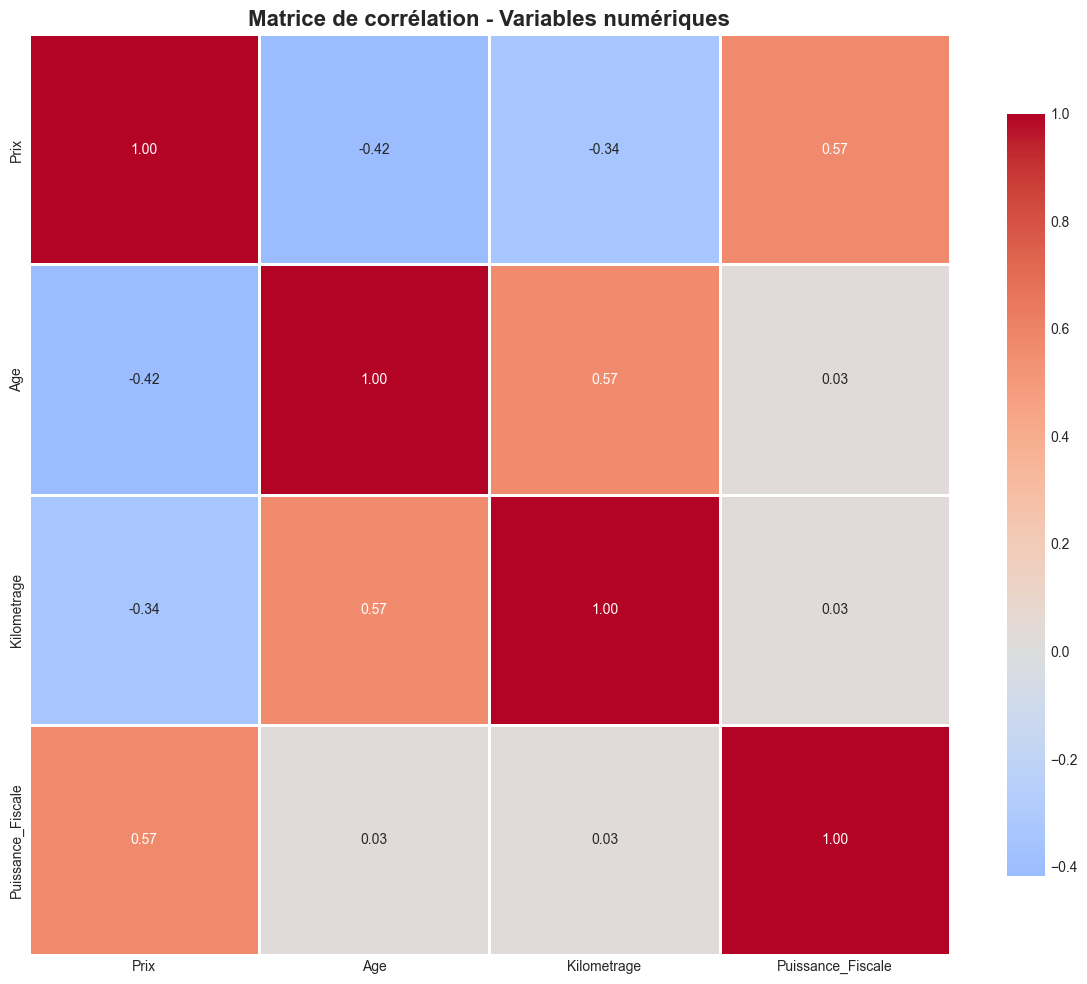


CORRÉLATIONS FORTES (|r| > 0.5)
Variable 1        Variable 2  Corrélation
      Prix Puissance_Fiscale         0.57
       Age       Kilometrage         0.57


In [195]:
# Matrice de corrélation pour les variables numériques
correlation_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.2f')
plt.title('Matrice de corrélation - Variables numériques', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("CORRÉLATIONS FORTES (|r| > 0.5)")
print("="*80)

# Trouver les corrélations fortes
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            corr_pairs.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Corrélation': correlation_matrix.iloc[i, j]
            })

if corr_pairs:
    corr_df = pd.DataFrame(corr_pairs).sort_values('Corrélation', ascending=False, key=abs)
    print(corr_df.to_string(index=False))
else:
    print("Aucune corrélation forte détectée")

## 14. Distribution des marques

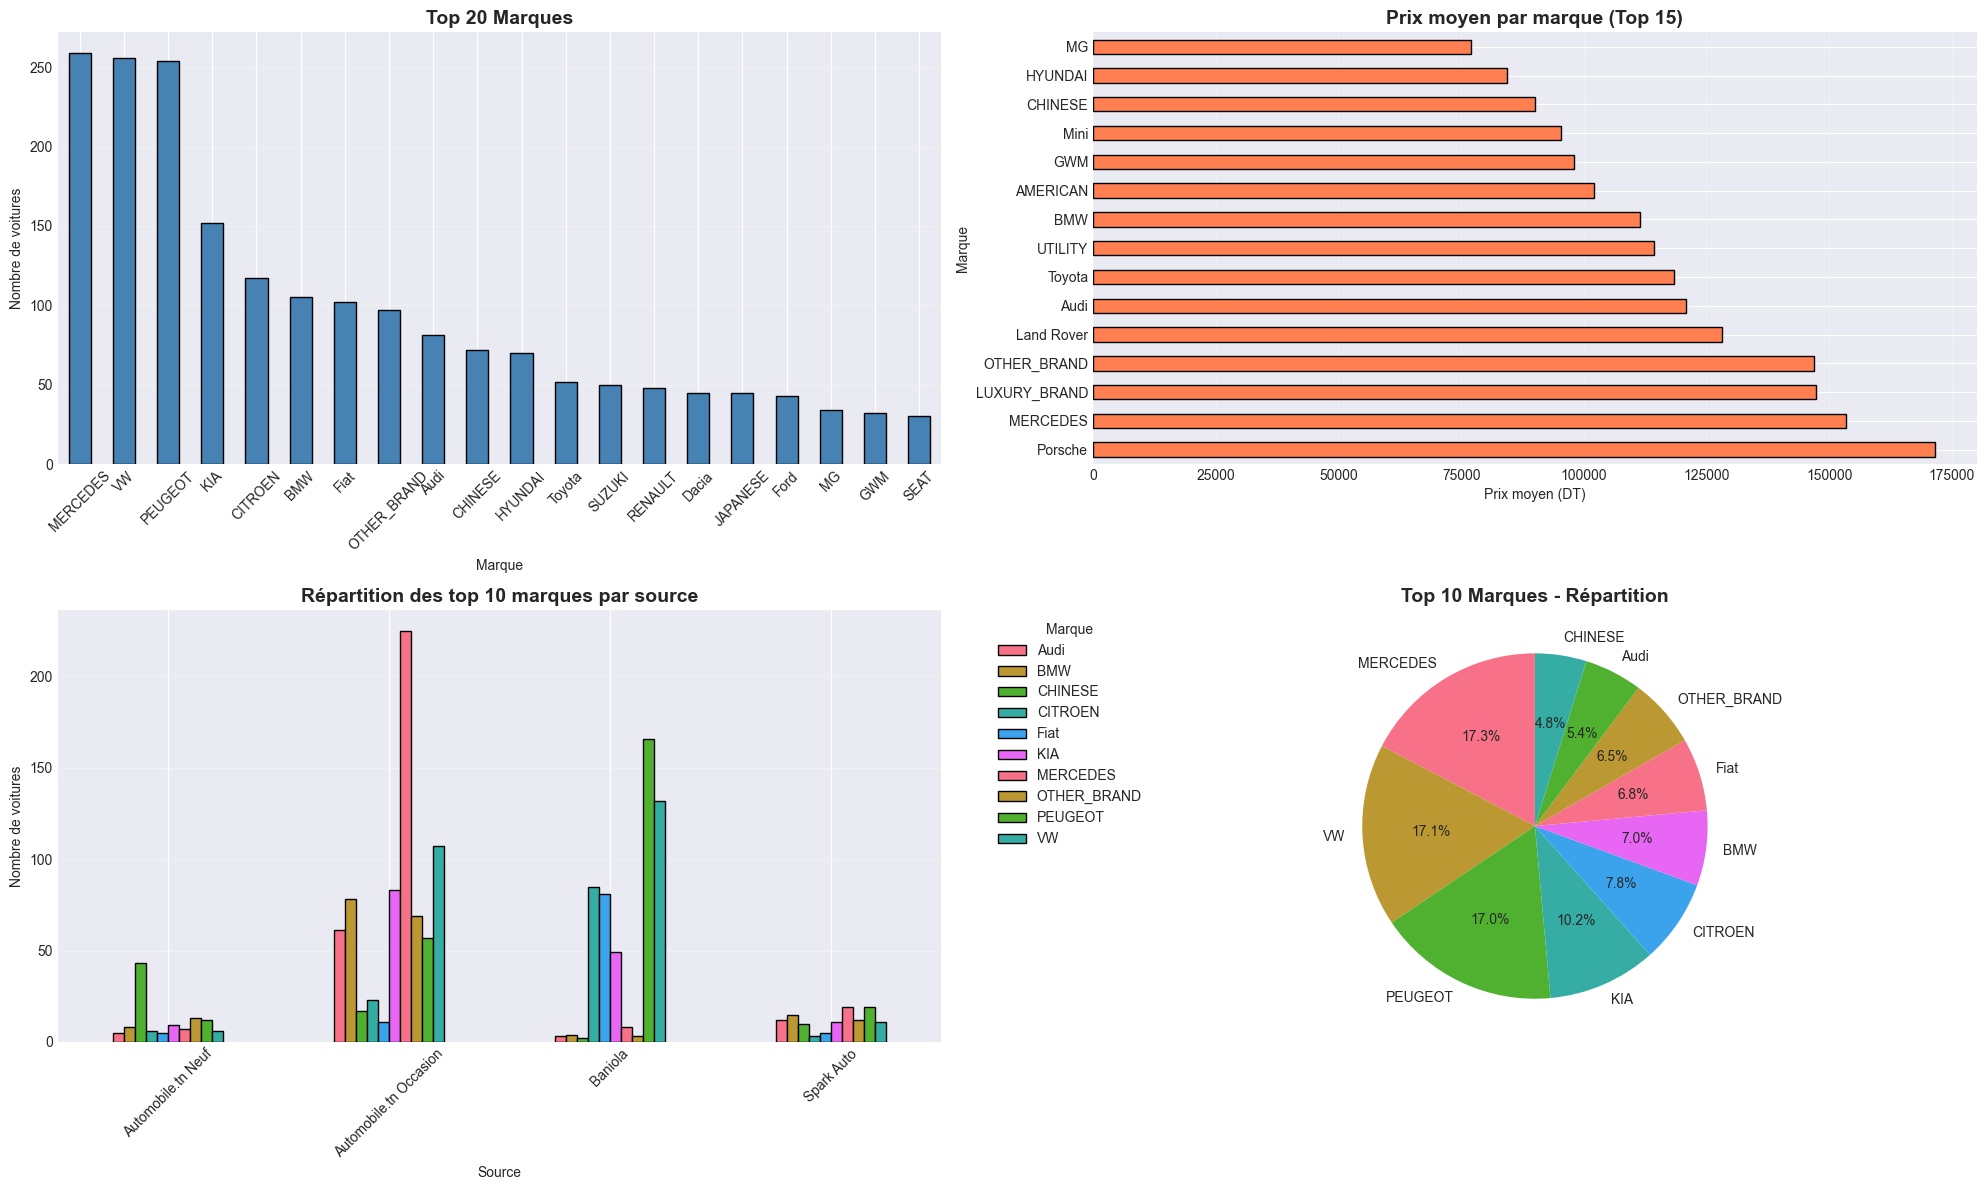


STATISTIQUES DES MARQUES
Total de marques: 30

Top 20 marques:
Marque
MERCEDES        259
VW              256
PEUGEOT         254
KIA             152
CITROEN         117
BMW             105
Fiat            102
OTHER_BRAND      97
Audi             81
CHINESE          72
HYUNDAI          70
Toyota           52
SUZUKI           50
RENAULT          48
Dacia            45
JAPANESE         45
Ford             43
MG               34
GWM              32
SEAT             30
AMERICAN         30
NISSAN           29
CHERY            26
SKODA            22
Porsche          21
LUXURY_BRAND     18
Opel             14
Mini             13
Land Rover       11
UTILITY           5
Name: count, dtype: int64


In [196]:
# Analyse détaillée des marques
if 'Marque' in df_clean.columns:
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    
    # Top 20 marques
    top_brands = df_clean['Marque'].value_counts().head(20)
    top_brands.plot(kind='bar', ax=axes[0, 0], color='steelblue', edgecolor='black')
    axes[0, 0].set_title('Top 20 Marques', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Marque')
    axes[0, 0].set_ylabel('Nombre de voitures')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Prix moyen par marque (top 15)
    if 'Prix' in df_clean.columns:
        avg_price_by_brand = df_clean.groupby('Marque')['Prix'].mean().sort_values(ascending=False).head(15)
        avg_price_by_brand.plot(kind='barh', ax=axes[0, 1], color='coral', edgecolor='black')
        axes[0, 1].set_title('Prix moyen par marque (Top 15)', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Prix moyen (DT)')
        axes[0, 1].set_ylabel('Marque')
        axes[0, 1].grid(axis='x', alpha=0.3)
    
    # Distribution par source et marque (top 10 marques)
    top_10_brands = df_clean['Marque'].value_counts().head(10).index
    brand_source = df_clean[df_clean['Marque'].isin(top_10_brands)].groupby(['Source', 'Marque']).size().unstack(fill_value=0)
    brand_source.plot(kind='bar', ax=axes[1, 0], stacked=False, edgecolor='black')
    axes[1, 0].set_title('Répartition des top 10 marques par source', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Source')
    axes[1, 0].set_ylabel('Nombre de voitures')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].legend(title='Marque', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Pie chart - Top 10 marques
    top_brands_pie = df_clean['Marque'].value_counts().head(10)
    top_brands_pie.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Top 10 Marques - Répartition', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*80)
    print("STATISTIQUES DES MARQUES")
    print("="*80)
    print(f"Total de marques: {df_clean['Marque'].nunique()}")
    print(f"\nTop 20 marques:")
    print(df_clean['Marque'].value_counts().head(97))

## 15. Distribution de l'énergie et boîte de vitesses

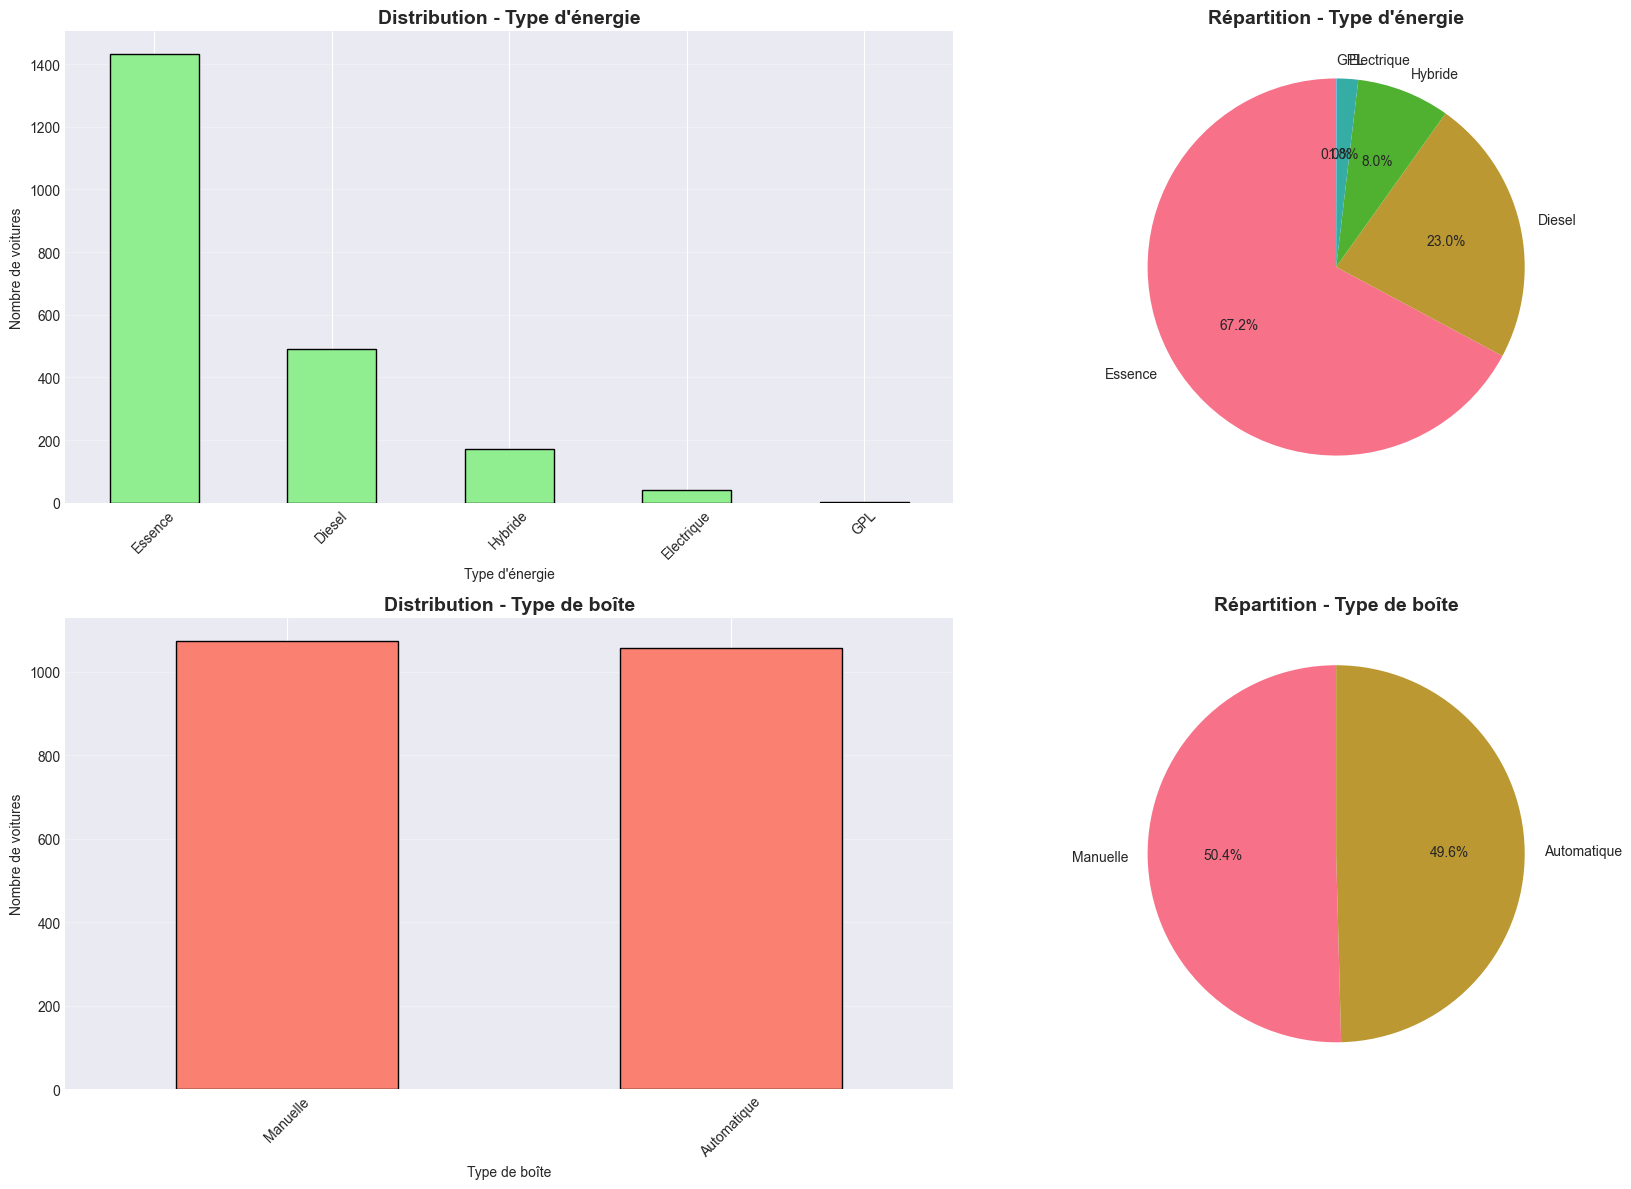


STATISTIQUES - ÉNERGIE ET TRANSMISSION

Énergie:
Energie
Essence       1433
Diesel         490
Hybride        170
Electrique      39
GPL              1
Name: count, dtype: int64

Boîte de vitesses:
Boite_Vitesses
Manuelle       1075
Automatique    1057
Name: count, dtype: int64


In [197]:
# Analyse de l'énergie et boîte de vitesses
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Énergie - Bar chart
if 'Energie' in df_clean.columns:
    df_clean['Energie'].value_counts().plot(kind='bar', ax=axes[0, 0], color='lightgreen', edgecolor='black')
    axes[0, 0].set_title('Distribution - Type d\'énergie', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Type d\'énergie')
    axes[0, 0].set_ylabel('Nombre de voitures')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Énergie - Pie chart
    df_clean['Energie'].value_counts().plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%', startangle=90)
    axes[0, 1].set_title('Répartition - Type d\'énergie', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('')

# Boîte de vitesses - Bar chart
if 'Boite_Vitesses' in df_clean.columns:
    df_clean['Boite_Vitesses'].value_counts().plot(kind='bar', ax=axes[1, 0], color='salmon', edgecolor='black')
    axes[1, 0].set_title('Distribution - Type de boîte', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Type de boîte')
    axes[1, 0].set_ylabel('Nombre de voitures')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Boîte de vitesses - Pie chart
    df_clean['Boite_Vitesses'].value_counts().plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Répartition - Type de boîte', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("STATISTIQUES - ÉNERGIE ET TRANSMISSION")
print("="*80)
if 'Energie' in df_clean.columns:
    print("\nÉnergie:")
    print(df_clean['Energie'].value_counts())
if 'Boite_Vitesses' in df_clean.columns:
    print("\nBoîte de vitesses:")
    print(df_clean['Boite_Vitesses'].value_counts())

## 16. Distribution de l'âge et de l'année

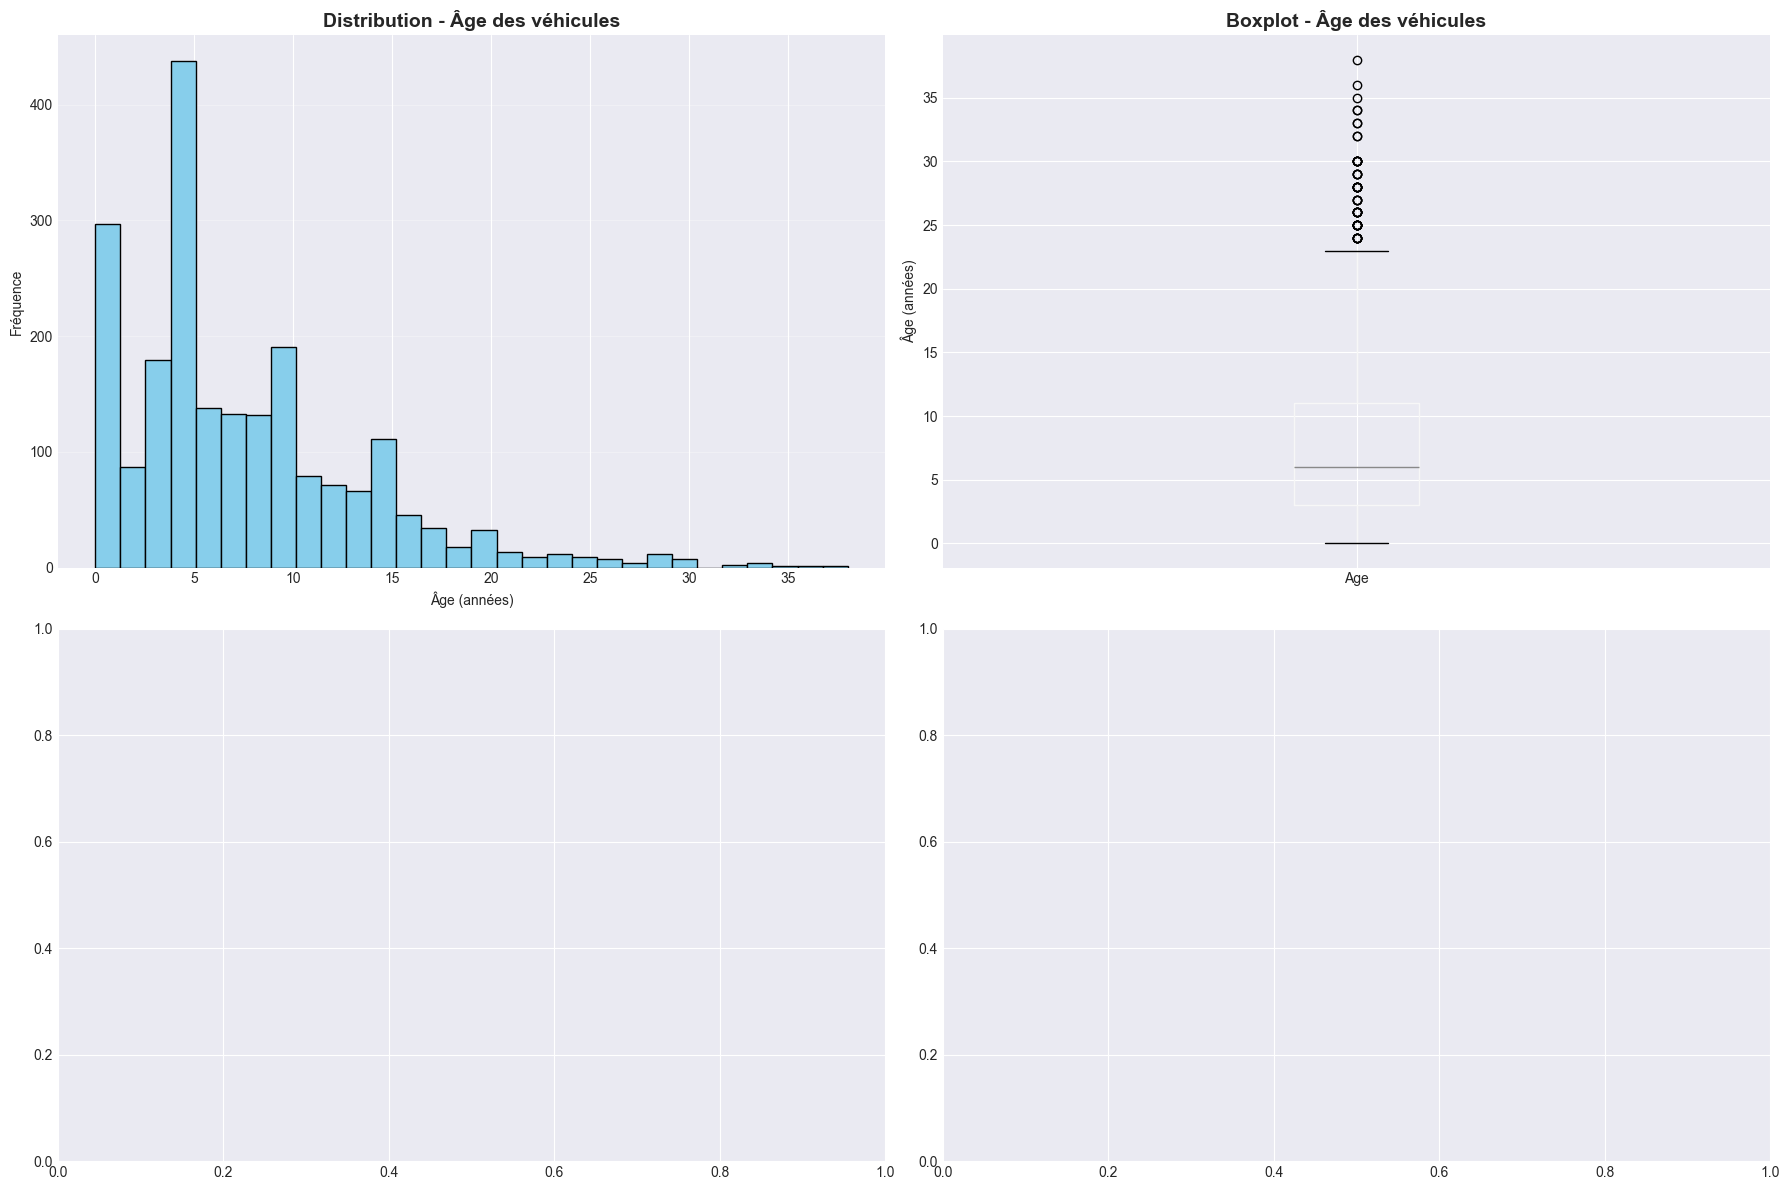


STATISTIQUES - ÂGE ET ANNÉE

Âge des véhicules:
count   2133.00
mean       7.45
std        6.10
min        0.00
25%        3.00
50%        6.00
75%       11.00
max       38.00
Name: Age, dtype: float64


In [198]:
# Analyse de l'âge et de l'année
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

if 'Age' in df_clean.columns:
    # Histogramme de l'âge
    df_clean['Age'].hist(bins=30, ax=axes[0, 0], color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Distribution - Âge des véhicules', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Âge (années)')
    axes[0, 0].set_ylabel('Fréquence')
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Boxplot de l'âge
    df_clean.boxplot(column='Age', ax=axes[0, 1])
    axes[0, 1].set_title('Boxplot - Âge des véhicules', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Âge (années)')

if 'Annee' in df_clean.columns:
    # Histogramme de l'année
    df_clean['Annee'].hist(bins=30, ax=axes[1, 0], color='lightgreen', edgecolor='black')
    axes[1, 0].set_title('Distribution - Année de fabrication', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Année')
    axes[1, 0].set_ylabel('Fréquence')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Bar chart - Top années
    top_years = df_clean['Annee'].value_counts().head(15).sort_index()
    top_years.plot(kind='bar', ax=axes[1, 1], color='coral', edgecolor='black')
    axes[1, 1].set_title('Top 15 Années', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Année')
    axes[1, 1].set_ylabel('Nombre de voitures')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("STATISTIQUES - ÂGE ET ANNÉE")
print("="*80)
if 'Age' in df_clean.columns:
    print("\nÂge des véhicules:")
    print(df_clean['Age'].describe())
if 'Annee' in df_clean.columns:
    print("\nAnnée de fabrication:")
    print(df_clean['Annee'].describe())

## 17. Traitement des outliers (optionnel)

In [199]:
# Option: Traiter les outliers avec clipping (1% et 99% percentiles)
# Décommenter si vous souhaitez traiter les outliers

print("TRAITEMENT DES OUTLIERS (Clipping 1%-99%)")
print("="*80)

df_final = df_clean.copy()

for col in numeric_cols:
    lower = df_final[col].quantile(0.01)
    upper = df_final[col].quantile(0.99)
    
    before_clip = df_final[col].copy()
    df_final[col] = df_final[col].clip(lower=lower, upper=upper)
    
    n_clipped = ((before_clip < lower) | (before_clip > upper)).sum()
    print(f"{col}: {n_clipped} valeurs clippées")

print(f"\n✓ Outliers traités par clipping")


# Pour l'instant, garder toutes les données
df_final = df_clean.copy()
print("✓ Aucun traitement d'outliers appliqué - Conservation de toutes les données")

TRAITEMENT DES OUTLIERS (Clipping 1%-99%)
Prix: 43 valeurs clippées
Age: 20 valeurs clippées
Kilometrage: 21 valeurs clippées
Puissance_Fiscale: 27 valeurs clippées

✓ Outliers traités par clipping
✓ Aucun traitement d'outliers appliqué - Conservation de toutes les données


In [200]:
# Traitement des outliers par clipping (1%-99%)
print("="*80)
print("TRAITEMENT DES OUTLIERS PAR CLIPPING")
print("="*80)

df_final = df_clean.copy()

print("\nApplication du clipping (percentiles 1% - 99%):\n")

for col in numeric_cols:
    # Calculer les percentiles
    lower = df_final[col].quantile(0.01)
    upper = df_final[col].quantile(0.99)
    
    # Compter les valeurs avant clipping
    before_clip = df_final[col].copy()
    n_lower = (before_clip < lower).sum()
    n_upper = (before_clip > upper).sum()
    n_clipped = n_lower + n_upper
    
    # Appliquer le clipping
    df_final[col] = df_final[col].clip(lower=lower, upper=upper)
    
    # Afficher les résultats
    print(f"{col}:")
    print(f"  Percentile 1%: {lower:.2f}")
    print(f"  Percentile 99%: {upper:.2f}")
    print(f"  Valeurs clippées en bas: {n_lower}")
    print(f"  Valeurs clippées en haut: {n_upper}")
    print(f"  Total clippé: {n_clipped} ({(n_clipped/len(df_final)*100):.2f}%)")
    print()

print(f"{'='*80}")
print(f"✓ Traitement des outliers terminé!")
print(f"{'='*80}")
print(f"\nDataset après clipping:")
print(f"  Nombre de lignes: {len(df_final)}")
print(f"  Nombre de colonnes: {len(df_final.columns)}")

TRAITEMENT DES OUTLIERS PAR CLIPPING

Application du clipping (percentiles 1% - 99%):

Prix:
  Percentile 1%: 8660.00
  Percentile 99%: 350000.00
  Valeurs clippées en bas: 22
  Valeurs clippées en haut: 21
  Total clippé: 43 (2.02%)

Age:
  Percentile 1%: 0.00
  Percentile 99%: 28.00
  Valeurs clippées en bas: 0
  Valeurs clippées en haut: 20
  Total clippé: 20 (0.94%)

Kilometrage:
  Percentile 1%: 0.00
  Percentile 99%: 384000.00
  Valeurs clippées en bas: 0
  Valeurs clippées en haut: 21
  Total clippé: 21 (0.98%)

Puissance_Fiscale:
  Percentile 1%: 4.00
  Percentile 99%: 23.00
  Valeurs clippées en bas: 7
  Valeurs clippées en haut: 20
  Total clippé: 27 (1.27%)

✓ Traitement des outliers terminé!

Dataset après clipping:
  Nombre de lignes: 2133
  Nombre de colonnes: 9


## 18. Résumé final complet

In [201]:
# Résumé complet du dataset final
print("\n" + "="*80)
print("RÉSUMÉ FINAL - DATASET COMPLET")
print("="*80)

print(f"\n📊 DONNÉES GÉNÉRALES:")
print(f"  Total de voitures: {len(df_final):,}")
print(f"  Nombre de colonnes: {len(df_final.columns)}")
print(f"  Colonnes: {list(df_final.columns)}")

print(f"\n📁 SOURCES:")
for source, count in df_final['Source'].value_counts().items():
    pct = (count / len(df_final)) * 100
    print(f"  {source}: {count:,} voitures ({pct:.2f}%)")

print(f"\n🔢 VARIABLES NUMÉRIQUES:")
for col in numeric_cols:
    print(f"  {col}:")
    print(f"    Min: {df_final[col].min():.2f}, Max: {df_final[col].max():.2f}")
    print(f"    Moyenne: {df_final[col].mean():.2f}, Médiane: {df_final[col].median():.2f}")

print(f"\n📝 VARIABLES CATÉGORIELLES:")
for col in categorical_cols:
    print(f"  {col}: {df_final[col].nunique()} valeurs uniques")

print(f"\n✅ QUALITÉ DES DONNÉES:")
print(f"  Valeurs manquantes: {df_final.isna().sum().sum()}")
print(f"  Doublons: {df_final.duplicated().sum()}")
print(f"  Taux de complétude: {((1 - df_final.isna().sum().sum() / (len(df_final) * len(df_final.columns))) * 100):.2f}%")

if 'Prix' in df_final.columns:
    print(f"\n💰 STATISTIQUES PRIX:")
    print(f"  Prix minimum: {df_final['Prix'].min():,.0f} DT")
    print(f"  Prix maximum: {df_final['Prix'].max():,.0f} DT")
    print(f"  Prix moyen: {df_final['Prix'].mean():,.0f} DT")
    print(f"  Prix médian: {df_final['Prix'].median():,.0f} DT")

print(f"\n" + "="*80)


RÉSUMÉ FINAL - DATASET COMPLET

📊 DONNÉES GÉNÉRALES:
  Total de voitures: 2,133
  Nombre de colonnes: 9
  Colonnes: ['Prix', 'Marque', 'Modele', 'Age', 'Kilometrage', 'Energie', 'Boite_Vitesses', 'Puissance_Fiscale', 'Source']

📁 SOURCES:
  Automobile.tn Occasion: 1,072 voitures (50.26%)
  Baniola: 644 voitures (30.19%)
  Automobile.tn Neuf: 215 voitures (10.08%)
  Spark Auto: 202 voitures (9.47%)

🔢 VARIABLES NUMÉRIQUES:
  Prix:
    Min: 8660.00, Max: 350000.00
    Moyenne: 83532.52, Médiane: 63950.00
  Age:
    Min: 0.00, Max: 28.00
    Moyenne: 7.42, Médiane: 6.00
  Kilometrage:
    Min: 0.00, Max: 384000.00
    Moyenne: 108341.98, Médiane: 95000.00
  Puissance_Fiscale:
    Min: 4.00, Max: 23.00
    Moyenne: 7.58, Médiane: 7.00

📝 VARIABLES CATÉGORIELLES:
  Marque: 30 valeurs uniques
  Modele: 448 valeurs uniques
  Energie: 5 valeurs uniques
  Boite_Vitesses: 2 valeurs uniques
  Source: 4 valeurs uniques

✅ QUALITÉ DES DONNÉES:
  Valeurs manquantes: 4
  Doublons: 0
  Taux de complé

## 19. Sauvegarde du dataset final

In [ ]:
# Créer le dossier de sortie
output_dir = '../Data/cleaned/'
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder le dataset final
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
csv_filename = os.path.join(output_dir, f'dataset_final_complet_petit.csv')
excel_filename = os.path.join(output_dir, f'dataset_final_complet_petit.xlsx')

# Sauvegarder en CSV
df_final.to_csv(csv_filename, index=False, encoding='utf-8-sig')
print(f"✓ Dataset final sauvegardé (CSV): {csv_filename}")
print(f"  Taille: {len(df_final)} lignes x {len(df_final.columns)} colonnes")

# Sauvegarder en Excel
try:
    df_final.to_excel(excel_filename, index=False, engine='openpyxl')
    print(f"✓ Dataset final sauvegardé (Excel): {excel_filename}")
except Exception as e:
    print(f"⚠️ Excel non sauvegardé: {e}")

print(f"\n{'='*80}")
print(f"🎉 ANALYSE ET SAUVEGARDE TERMINÉES AVEC SUCCÈS!")
print(f"{'='*80}")

✓ Dataset final sauvegardé (CSV): ../Data/cleaned/dataset_final_complet_grand.csv
  Taille: 5185 lignes x 9 colonnes
✓ Dataset final sauvegardé (Excel): ../Data/cleaned/dataset_final_complet_grand.xlsx

🎉 ANALYSE ET SAUVEGARDE TERMINÉES AVEC SUCCÈS!
✓ Dataset final sauvegardé (Excel): ../Data/cleaned/dataset_final_complet_grand.xlsx

🎉 ANALYSE ET SAUVEGARDE TERMINÉES AVEC SUCCÈS!


In [202]:
# Afficher un aperçu final
print("Aperçu du dataset final:\n")
df_final.head(20)

Aperçu du dataset final:



,Prix,Marque,Modele,Age,Kilometrage,Energie,Boite_Vitesses,Puissance_Fiscale,Source
0,30500.00,PEUGEOT,208,7.00,80000.00,Essence,Manuelle,5.00,Baniola
1,23000.00,PEUGEOT,107,14.00,270.00,Essence,Manuelle,4.00,Baniola
2,75000.00,PEUGEOT,3008,7.00,179000.00,Diesel,Automatique,6.00,Baniola
3,25500.00,PEUGEOT,208,9.00,160000.00,Essence,Manuelle,5.00,Baniola
4,26000.00,PEUGEOT,508,14.00,0.00,Diesel,Automatique,6.00,Baniola
5,9000.00,PEUGEOT,207,14.00,103000.00,Diesel,Manuelle,5.00,Baniola
6,25000.00,PEUGEOT,308,16.00,203000.00,Essence,Manuelle,6.00,Baniola
7,26500.00,PEUGEOT,308,17.00,195000.00,Essence,Automatique,5.00,Baniola
8,30000.00,PEUGEOT,208,10.00,113000.00,Essence,Manuelle,5.00,Baniola
9,13000.00,PEUGEOT,Expert,24.00,99999.00,Diesel,Manuelle,7.00,Baniola
